__uwaga:__

są tutaj niżej dwie mapki interaktywne, które tak średnio dość się pokazują na githubie, więc warto zobaczyć ten notebook [tutaj na nbviewer](https://nbviewer.jupyter.org/github/TichyProgs/woronoj/blob/master/woronszawa.ipynb?flush_cache=true)

### Warszawa woronoja

[tutaj tutorial, z którego korzystałem](https://towardsdatascience.com/how-to-create-voronoi-regions-with-geospatial-data-in-python-adbb6c5f2134) przygotowując _Диаграмма Вороного_ dla Warszawy.

[Wikipedia](https://pl.wikipedia.org/wiki/Diagram_Woronoja) tłumaczy

In [9]:
import numpy as np
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords
import shapely

źródło dla shapefile'a: [gis support](https://gis-support.pl/granice-administracyjne)

In [10]:
shpwwa = "Warsze/dzielnice_Warszawy.shp"

wwa = gpd.read_file(shpwwa)
wwa

,nazwa_dzie,geometry
0,Żoliborz,"POLYGON ((633539.527 490793.934, 633542.003 49..."
1,Praga-Południe,"POLYGON ((643637.355 486100.653, 643623.409 48..."
2,Mokotów,"POLYGON ((638075.459 484924.185, 638083.540 48..."
3,Wola,"POLYGON ((635178.545 489906.766, 635181.466 48..."
4,Wilanów,"POLYGON ((643831.799 482999.436, 643838.935 48..."
5,Wesoła,"POLYGON ((649656.782 487878.522, 649437.965 48..."
6,Wawer,"POLYGON ((644054.020 482432.971, 644051.556 48..."
7,Włochy,"POLYGON ((631133.767 484862.977, 631146.760 48..."
8,Ursynów,"POLYGON ((635835.113 479216.177, 635867.908 47..."
9,Śródmieście,"POLYGON ((640812.855 485462.412, 640802.548 48..."


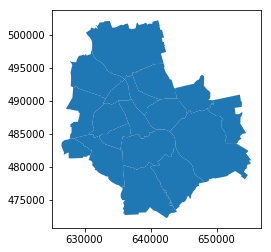

In [17]:
wwa.plot()
plt.show()

In [383]:
# google maps
ratusze_p = [
    (52.240330, 20.987387),   # wola
    (52.192294, 20.959278),   # włochy
    (52.221530, 20.986751),   # ochota
    (52.208574, 21.014752),   # mokotów
    (52.206134, 21.171079),   # wawer
    (52.320972, 20.970665),   # białołęka
    (52.276216, 20.947955),   # bielany
    (52.291419, 21.049002),   # targówek
    (52.270224, 20.983323),   # żoliborz
    (52.246632, 21.068479),   # praga-południe
    (52.164525, 21.082399),   # wilanów
    (52.245757, 21.223430),   # wesoła
    (52.148892, 21.045718),   # ursynów
    (52.227973, 21.010648),   # śródmieście
    (52.250924, 21.032143),   # praga-północ
    (52.200888, 20.893370),   # ursus
    (52.258718, 21.161848),   # rembertów
    (52.238691, 20.913958)    # bemowo
]

ratusze = [shapely.geometry.Point(y, x) for x, y in ratusze_p]

In [12]:
dzielnice = ['wola',
 'włochy',
 'ochota',
 'mokotów',
 'wawer',
 'białołęka',
 'bielany',
 'targówek',
 'żoliborz',
 'praga-południe',
 'wilanów',
 'wesoła',
 'ursynów',
 'śródmieście',
 'praga-północ',
 'ursus',
 'rembertów',
 'bemowo']

In [14]:
wwa_ratusze = pd.DataFrame({"nazwa_dzie": dzielnice,
              "ratusze": ratusze})
gdf_ratusze = gpd.GeoDataFrame(
    wwa_ratusze, geometry=wwa_ratusze.ratusze)
gdf_ratusze

,nazwa_dzie,ratusze,geometry
0,wola,POINT (20.987387 52.24033),POINT (20.98739 52.24033)
1,włochy,POINT (20.959278 52.192294),POINT (20.95928 52.19229)
2,ochota,POINT (20.986751 52.22153),POINT (20.98675 52.22153)
3,mokotów,POINT (21.014752 52.208574),POINT (21.01475 52.20857)
4,wawer,POINT (21.171079 52.206134),POINT (21.17108 52.20613)
5,białołęka,POINT (20.970665 52.320972),POINT (20.97067 52.32097)
6,bielany,POINT (20.947955 52.276216),POINT (20.94796 52.27622)
7,targówek,POINT (21.049002 52.291419),POINT (21.04900 52.29142)
8,żoliborz,POINT (20.983323 52.270224),POINT (20.98332 52.27022)
9,praga-południe,POINT (21.068479 52.246632),POINT (21.06848 52.24663)


In [15]:
gdf_ratusze[gdf_ratusze.nazwa_dzie == "wola"]["geometry"]

0    POINT (20.98739 52.24033)
Name: geometry, dtype: geometry

In [16]:
gdf_ratusze.crs = 'epsg:4326'

gdf_ratusze.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

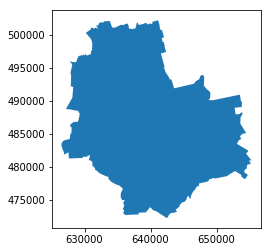

In [18]:
polygon = wwa.geometry.unary_union
gdf2 = gpd.GeoDataFrame(geometry=[polygon.buffer(0)], crs=wwa.crs)
gdf2.plot()
plt.show()

In [19]:
boundary = gdf2

boundary

,geometry
0,"POLYGON ((648029.562 477598.103, 647975.514 47..."


In [20]:
boundary = boundary.to_crs(gdf_ratusze.crs)

boundary

,geometry
0,"POLYGON ((21.16403 52.14463, 21.16324 52.14454..."


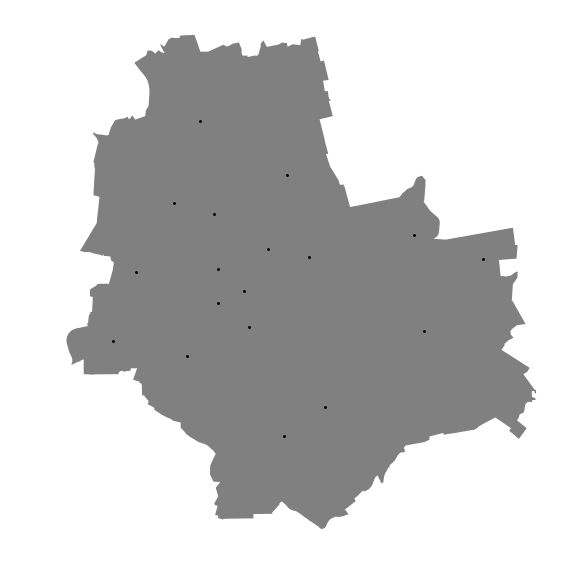

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
boundary.plot(ax=ax, color="gray")
gdf_ratusze.to_crs(boundary.crs).plot(ax=ax, markersize=3.5, color="black")
ax.axis("off")
#plt.axis("equal")
plt.show()

In [22]:
boundary = boundary.to_crs(epsg=3395)
gdf_proj = gdf_ratusze.to_crs(boundary.crs)

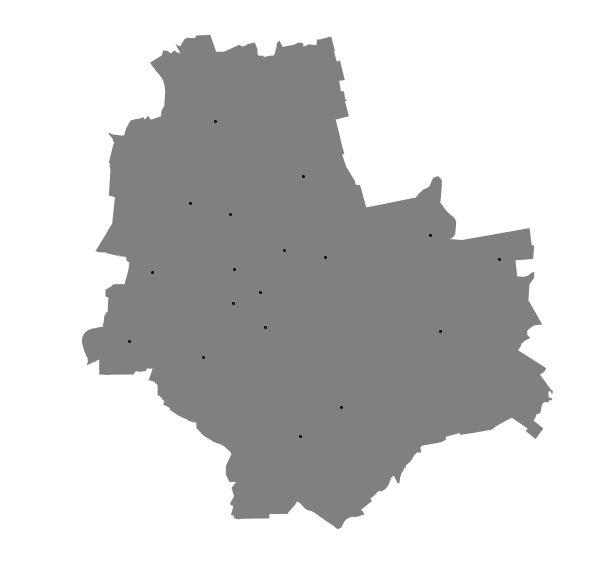

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
boundary.plot(ax=ax, color="gray")
gdf_proj.plot(ax=ax, markersize=3.5, color="black")
ax.axis("off")
#plt.axis("equal")
plt.show()

In [24]:
boundary_shape = cascaded_union(boundary.geometry.buffer(0))
coords = points_to_coords(gdf_proj.geometry)

In [25]:
# Calculate Voronoi Regions
poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, 
                                                                       boundary_shape)

In [85]:
poly_shapes, pts, 
dzielnice_woro = [dzielnice[el[0]] for el in poly_to_pt_assignments]
dzielnice_woro

['targówek',
 'rembertów',
 'wesoła',
 'praga-południe',
 'wawer',
 'białołęka',
 'żoliborz',
 'praga-północ',
 'mokotów',
 'wilanów',
 'bielany',
 'ursus',
 'włochy',
 'ursynów',
 'wola',
 'bemowo',
 'śródmieście',
 'ochota']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


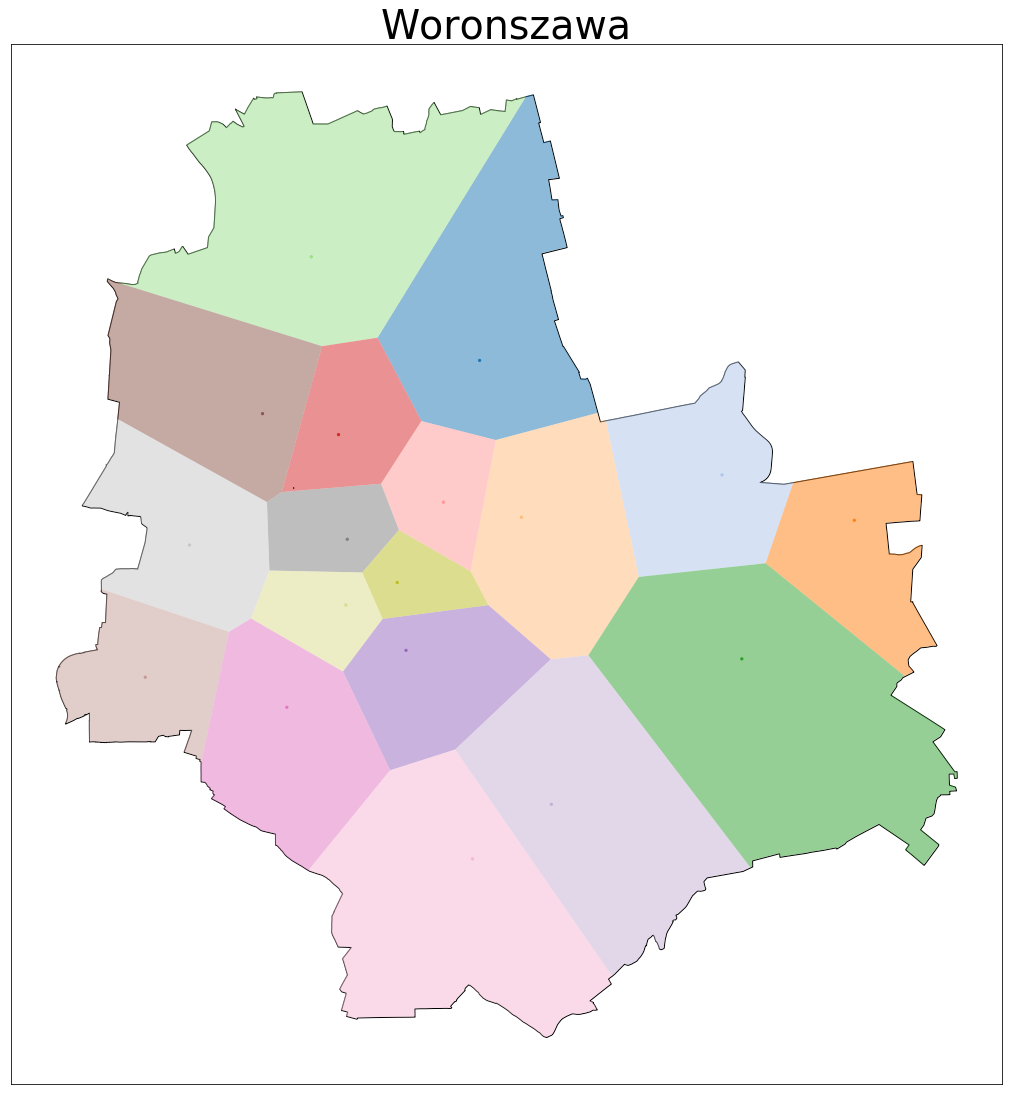

In [162]:
fig, ax = subplot_for_map()
plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, pts, poly_to_pt_assignments)
ax.set_title('Woronszawa')
plt.tight_layout()
plt.show()

## FONT

In [163]:
import matplotlib
plt.rcParams['figure.figsize'] = [18, 16]
font = {'family' : 'normal' ,#'Comic Sans MS',
        'weight' : 'normal',
        'size'   : 33}

matplotlib.rc('font', **font)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


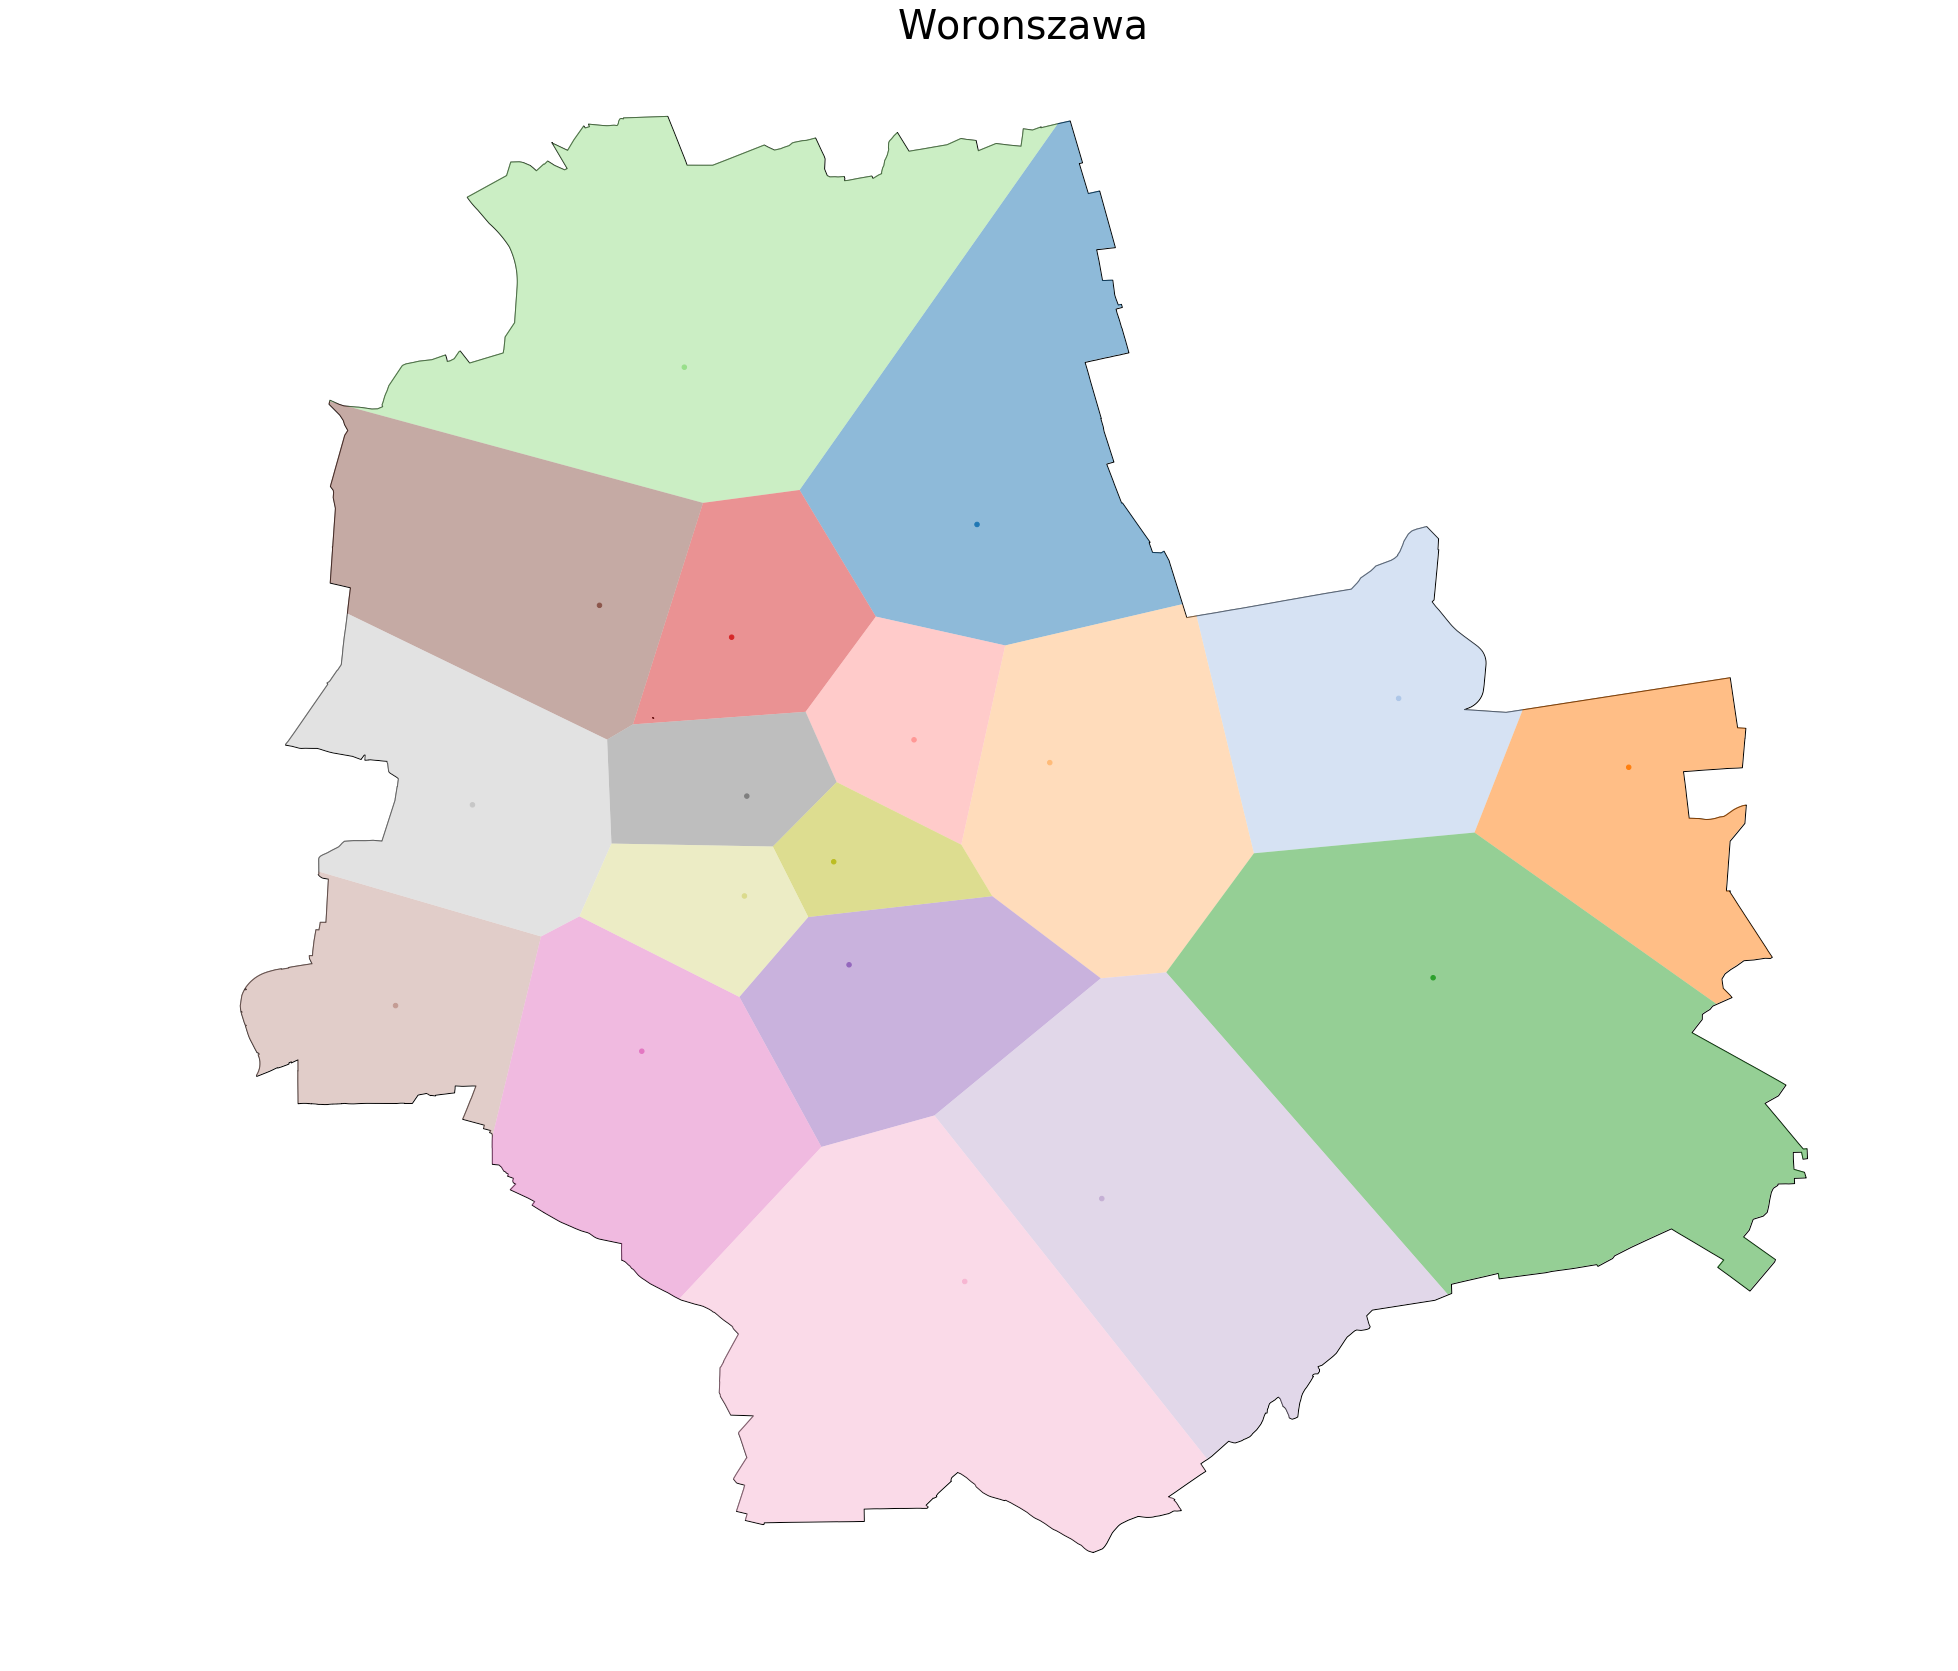

In [164]:
fig, ax = plt.subplots(figsize=(28,24))
plot_voronoi_polys_with_points_in_area(ax, 
                                       boundary_shape, 
                                       poly_shapes, pts,
                                       poly_to_pt_assignments,
                                       voronoi_and_points_cmap='tab20',
                                       points_markersize=20) #,
                                       # voronoi_edgecolor="grey")
ax.set_title('Woronszawa')
ax.axis("off")
plt.tight_layout()
plt.savefig("woronszawa.png", dpi=600, format="png")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


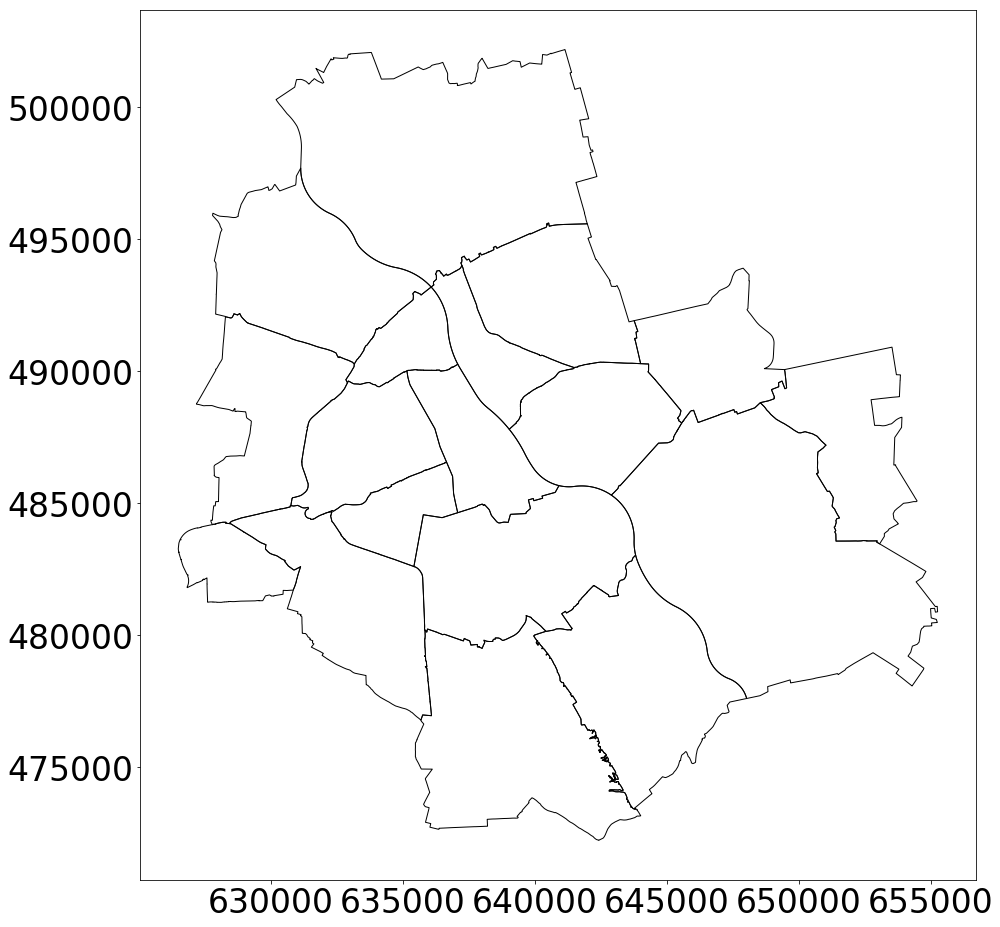

In [165]:
wwa.plot(facecolor="none", edgecolor="black")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


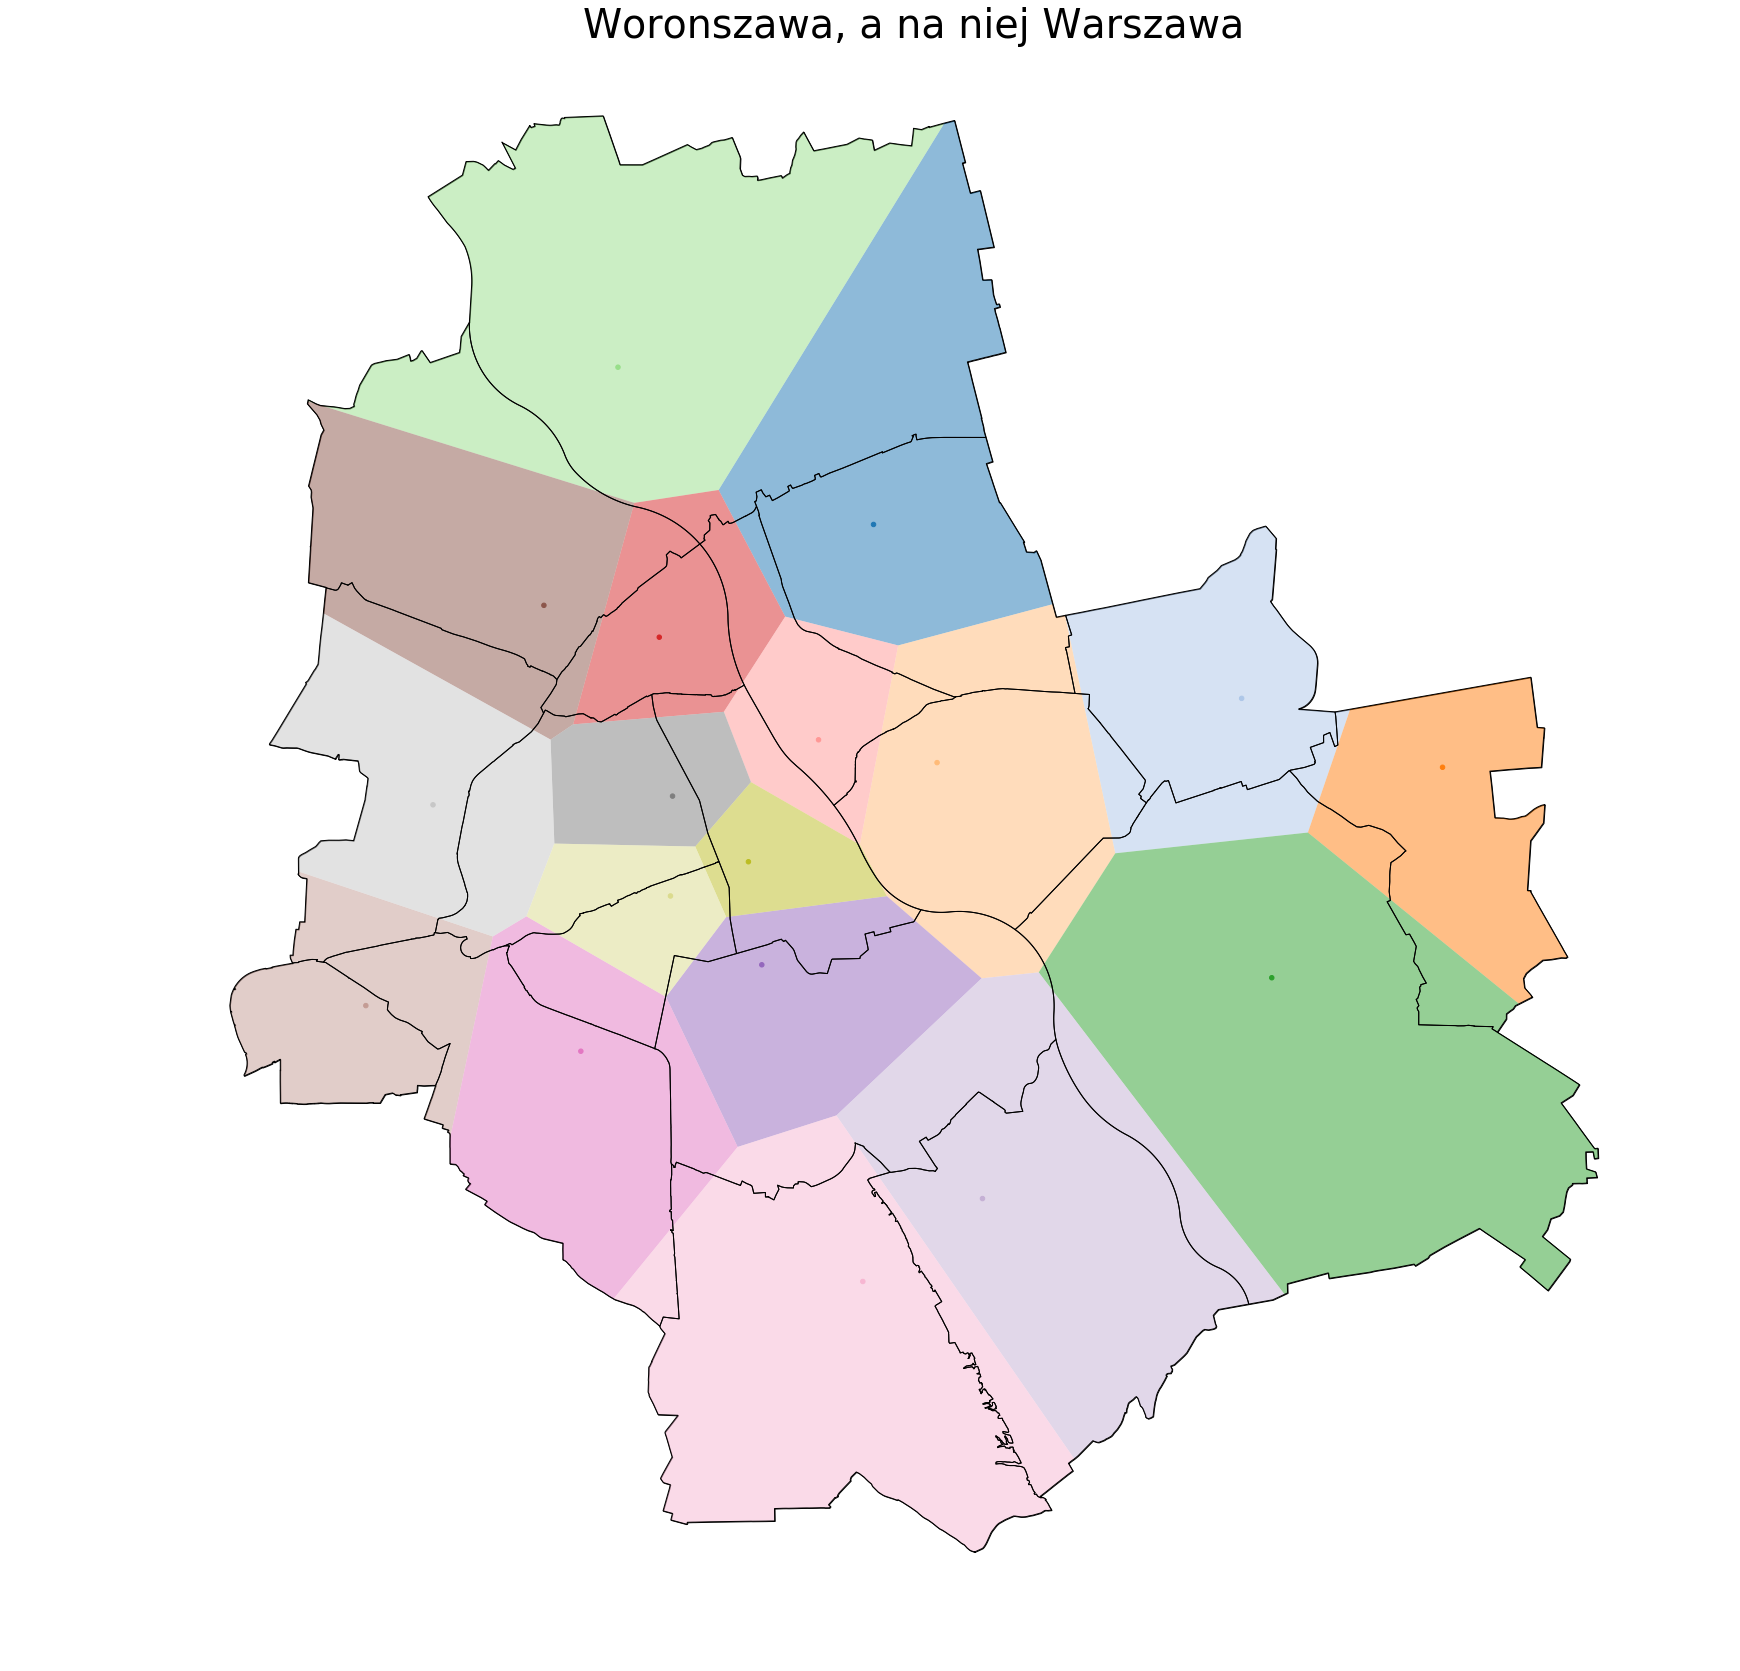

In [166]:
fig, ax = plt.subplots(figsize=(28,24))
plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, pts, poly_to_pt_assignments,
 voronoi_and_points_cmap='tab20',
 points_markersize=20)
wwa.to_crs(gdf_proj.crs).plot(ax=ax, facecolor="none", edgecolor="black")
ax.set_title('Woronszawa, a na niej Warszawa')
ax.axis("off")
plt.tight_layout()
plt.savefig("woronszawa_borders.png", dpi=600, format="png")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


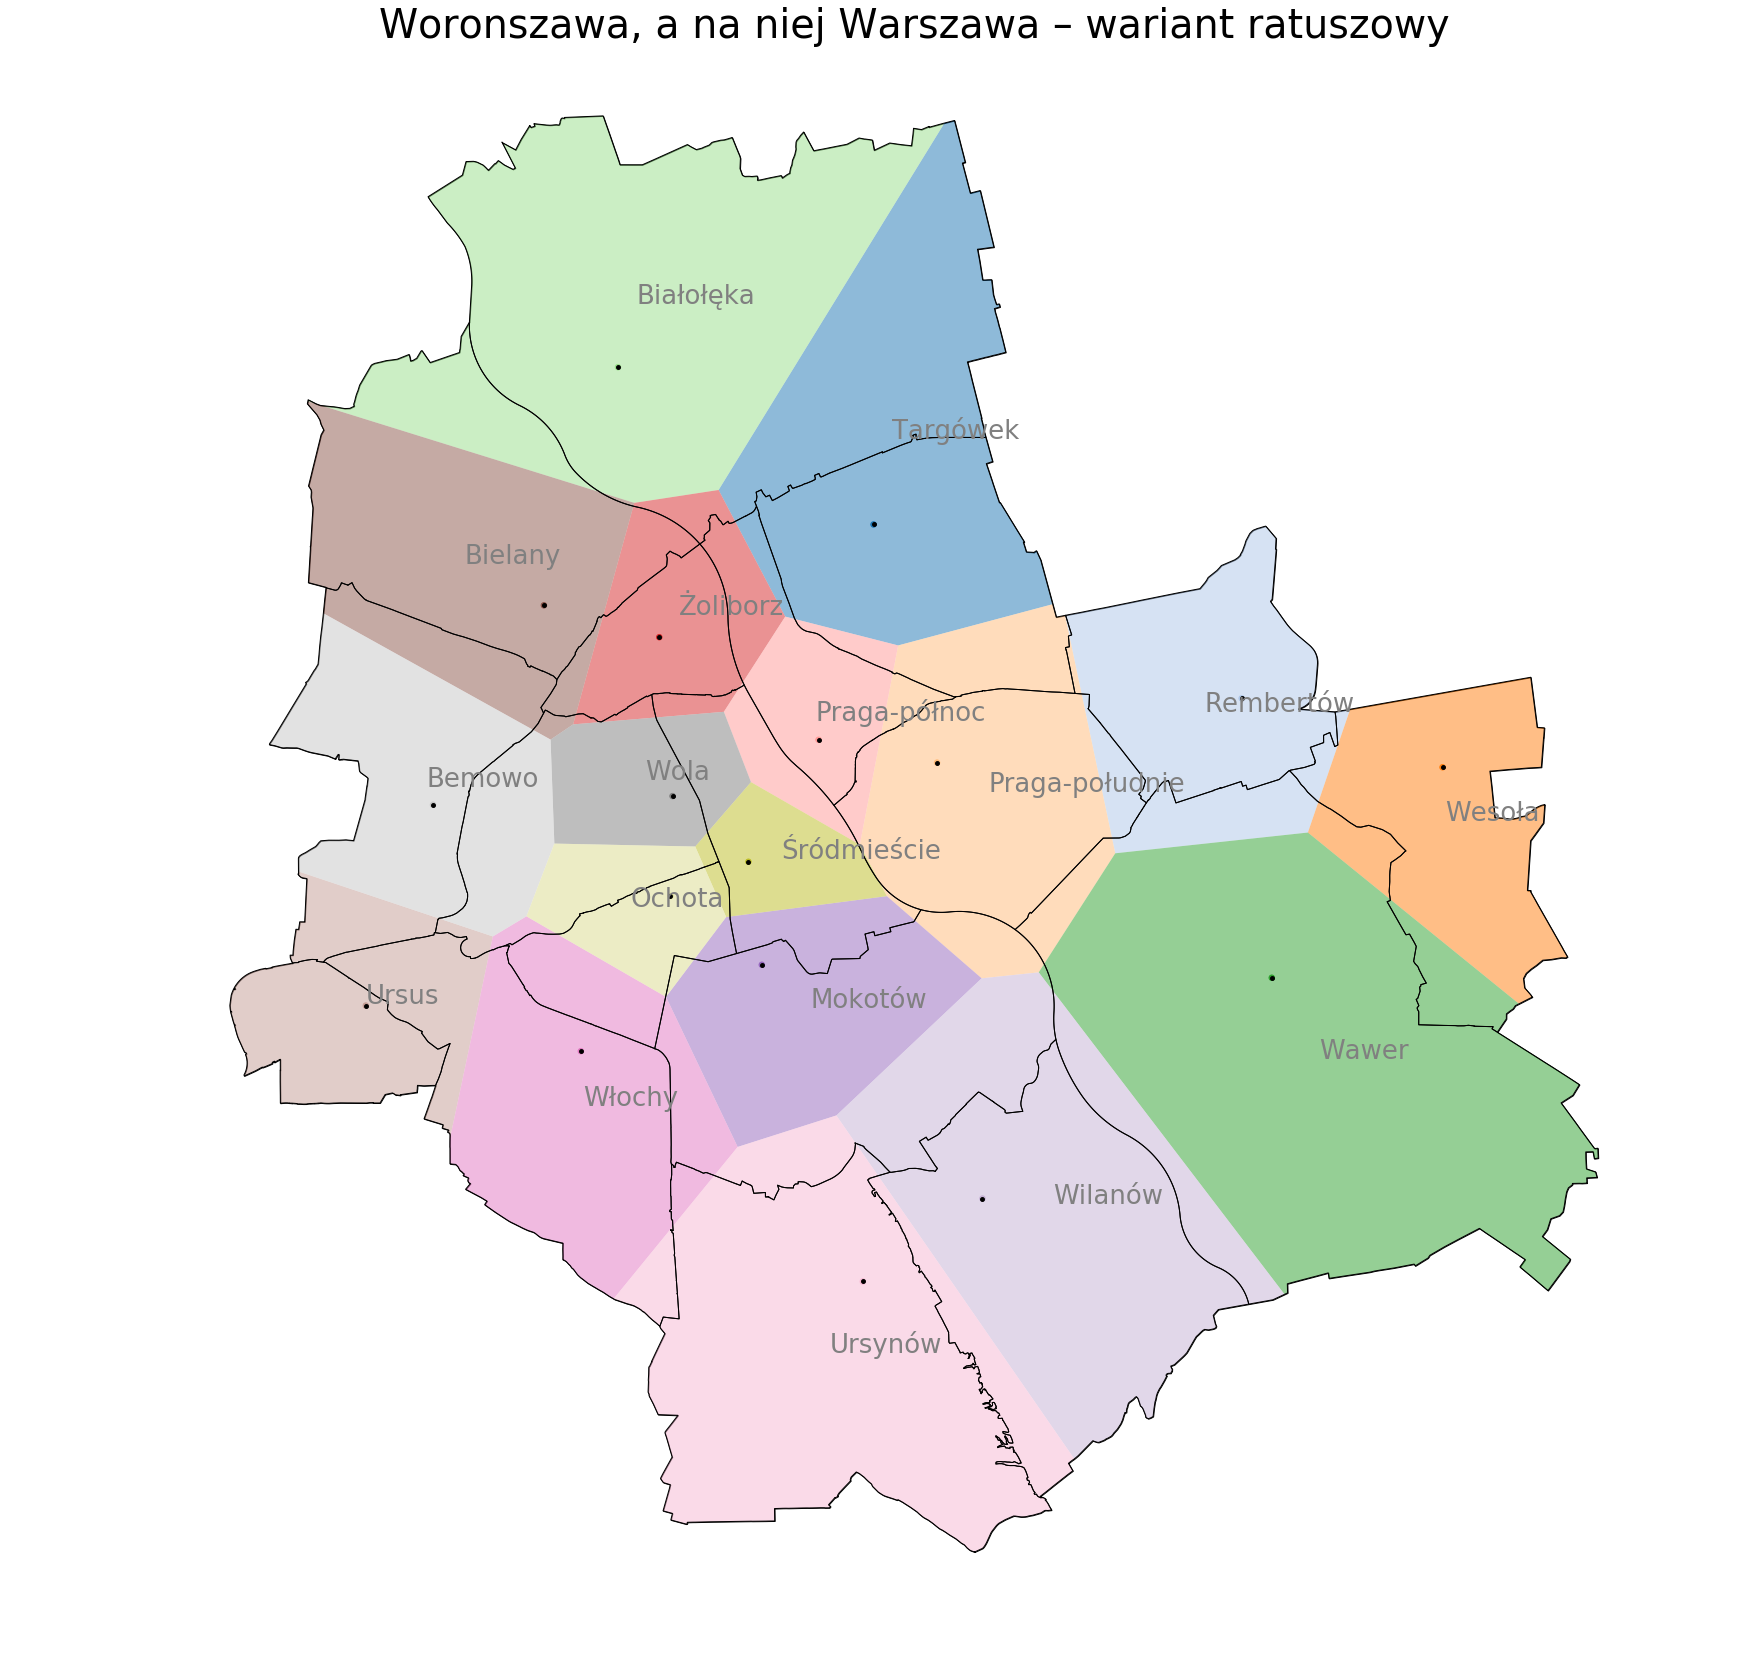

In [299]:
fig, ax = plt.subplots(figsize=(28,24))
plot_voronoi_polys_with_points_in_area(ax, 
                                       boundary_shape, 
                                       poly_shapes, 
                                       pts, 
                                       poly_to_pt_assignments,
                                       voronoi_and_points_cmap="tab20",
                                       # voronoi_edgecolor="grey",
                                       points_markersize=30,
                                       points_color="black",
                                       point_labels= None, #[d.capitalize() for d in dzielnice],
                                       point_label_fontsize=26,
                                       point_label_color="grey",
                                       voronoi_labels=[d.capitalize() for d in dzielnice_woro],
                                       voronoi_label_fontsize=26,
                                       voronoi_label_color="grey")
wwa.to_crs(gdf_proj.crs).plot(ax=ax, facecolor="none", edgecolor="black")
ax.set_title('Woronszawa, a na niej Warszawa – wariant ratuszowy')
gpd.GeoDataFrame(pd.DataFrame({"ratusze": pts}),
                 geometry="ratusze").plot(ax=ax,
                                     color="black",
                                     markersize=15)
ax.axis("off")
plt.tight_layout()
plt.savefig("woronszawa_ratusze.png", dpi=600, format="png")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


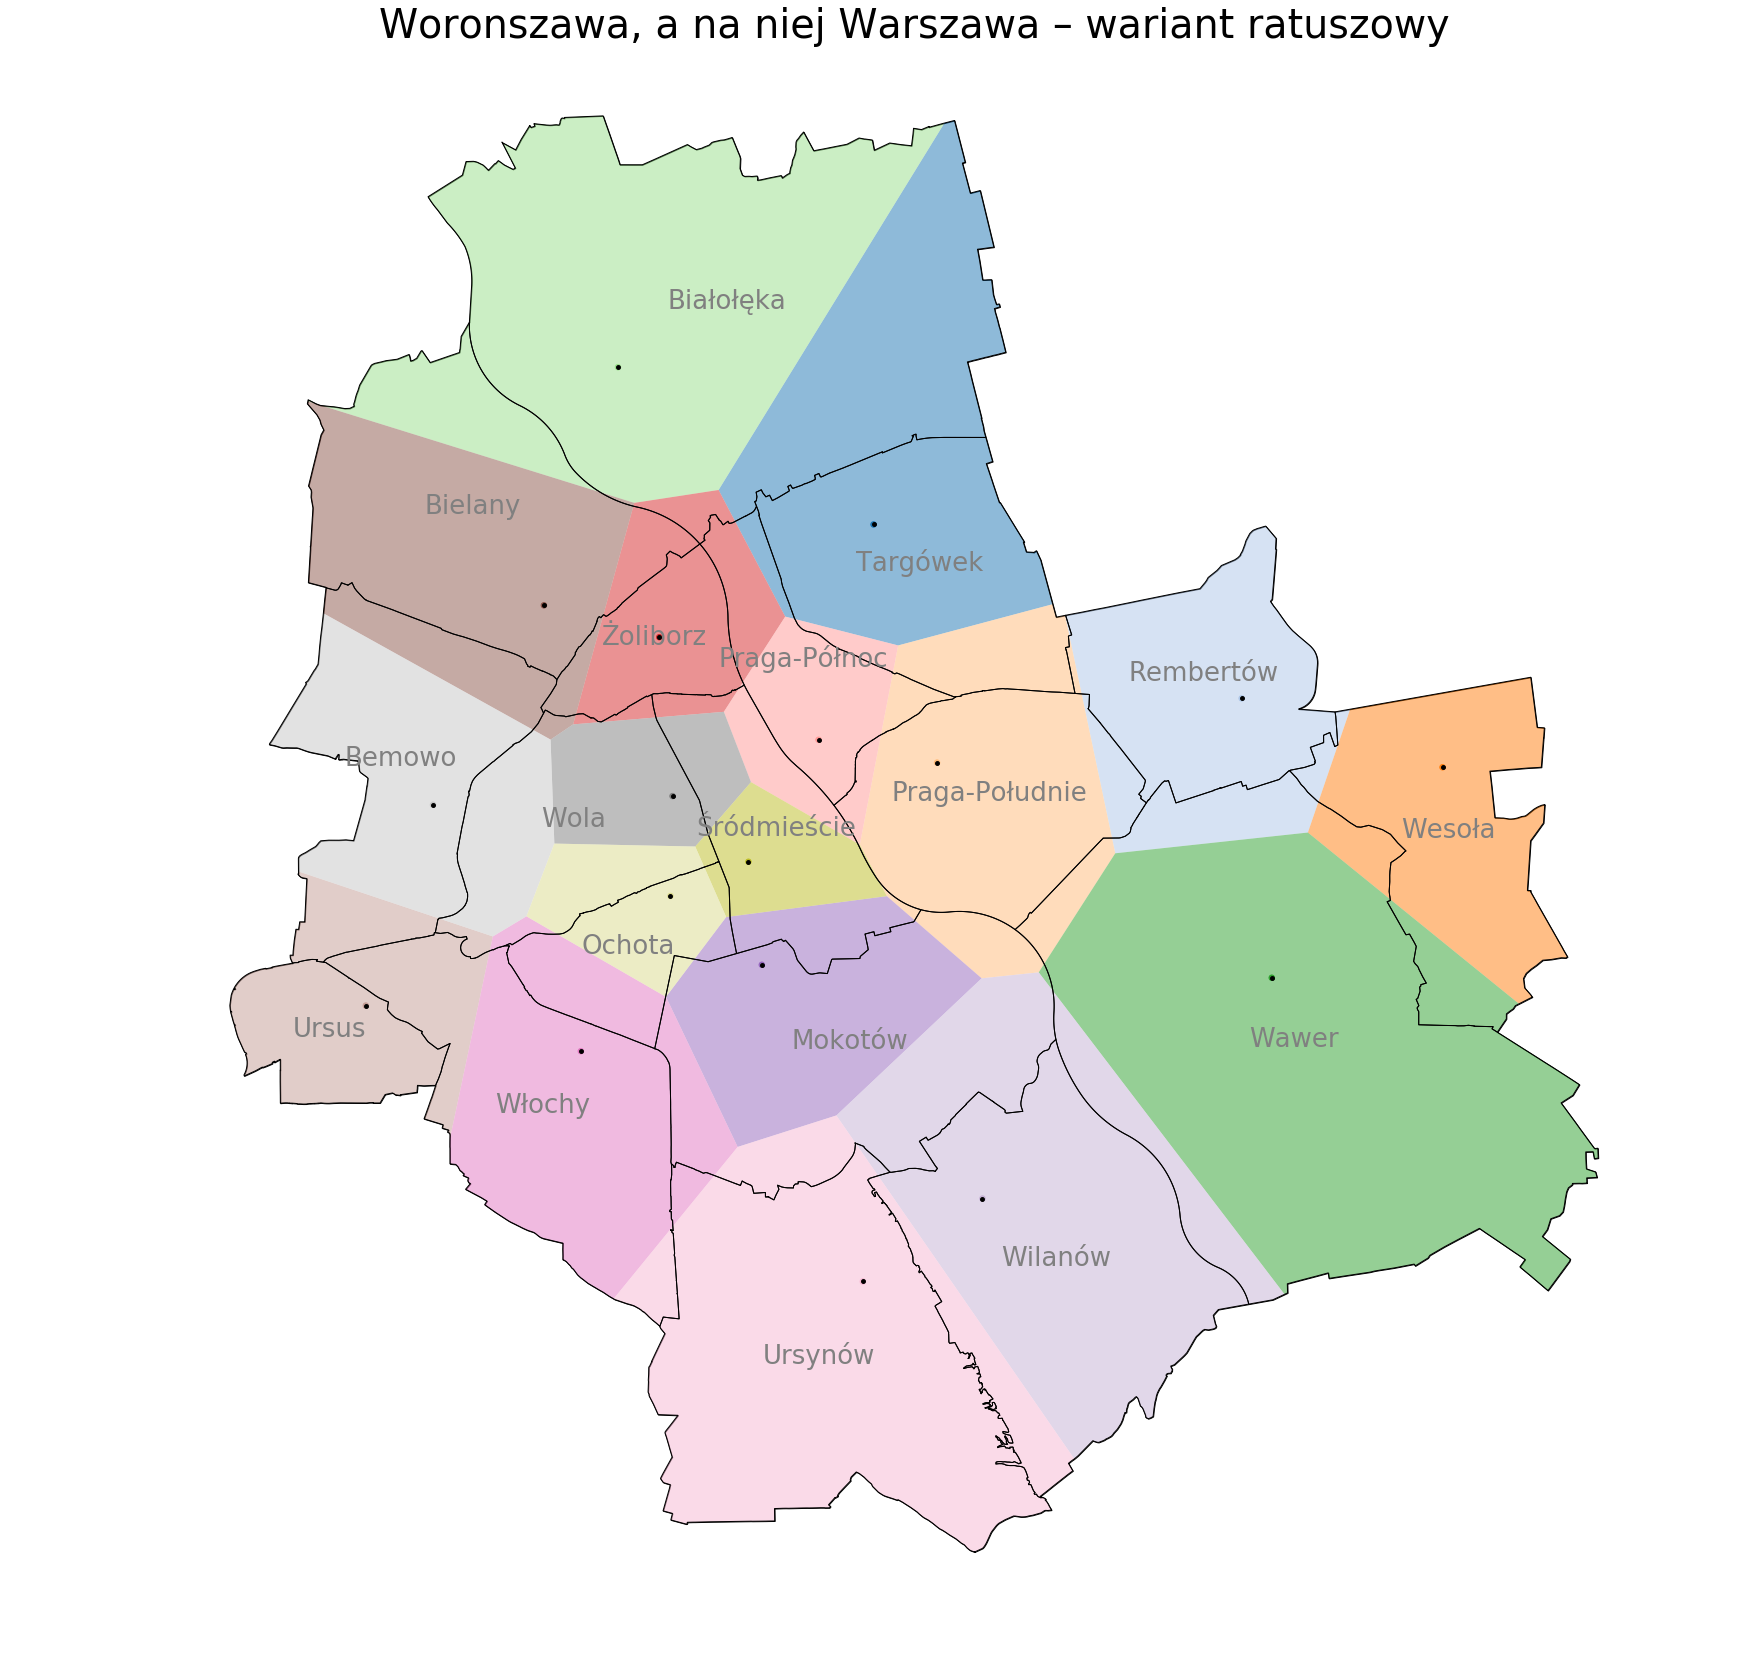

In [300]:
fig, ax = plt.subplots(figsize=(28,24))
plot_voronoi_polys_with_points_in_area(ax, 
                                       boundary_shape, 
                                       poly_shapes, 
                                       pts, 
                                       poly_to_pt_assignments,
                                       voronoi_and_points_cmap='tab20',
                                       # voronoi_edgecolor="grey",
                                       points_markersize=30,
                                       points_color="black",
                                       point_labels= None, #[d.capitalize() for d in dzielnice],
                                       point_label_fontsize=26,
                                       point_label_color="grey",
                                       voronoi_labels=None, #[d.capitalize() for d in dzielnice_woro],
                                       voronoi_label_fontsize=26,
                                       voronoi_label_color="grey")
wwa.to_crs(gdf_proj.crs).plot(ax=ax, facecolor="none", edgecolor="black")

# nazwa na środku kazdej dzielnicy
for idx, row in wwa.to_crs(gdf_voro.crs).iterrows():
    plt.annotate(s=row['nazwa_dzie'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', color="grey", fontsize=26)
# zaznaczam ratusze
gpd.GeoDataFrame(pd.DataFrame({"ratusze": pts}),
                 geometry="ratusze").plot(ax=ax,
                                     color="black",
                                     markersize=15)
ax.set_title('Woronszawa, a na niej Warszawa – wariant ratuszowy')
ax.axis("off")
plt.tight_layout()
plt.savefig("woronszawa_ratusze_etykiety.png", dpi=600, format="png")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


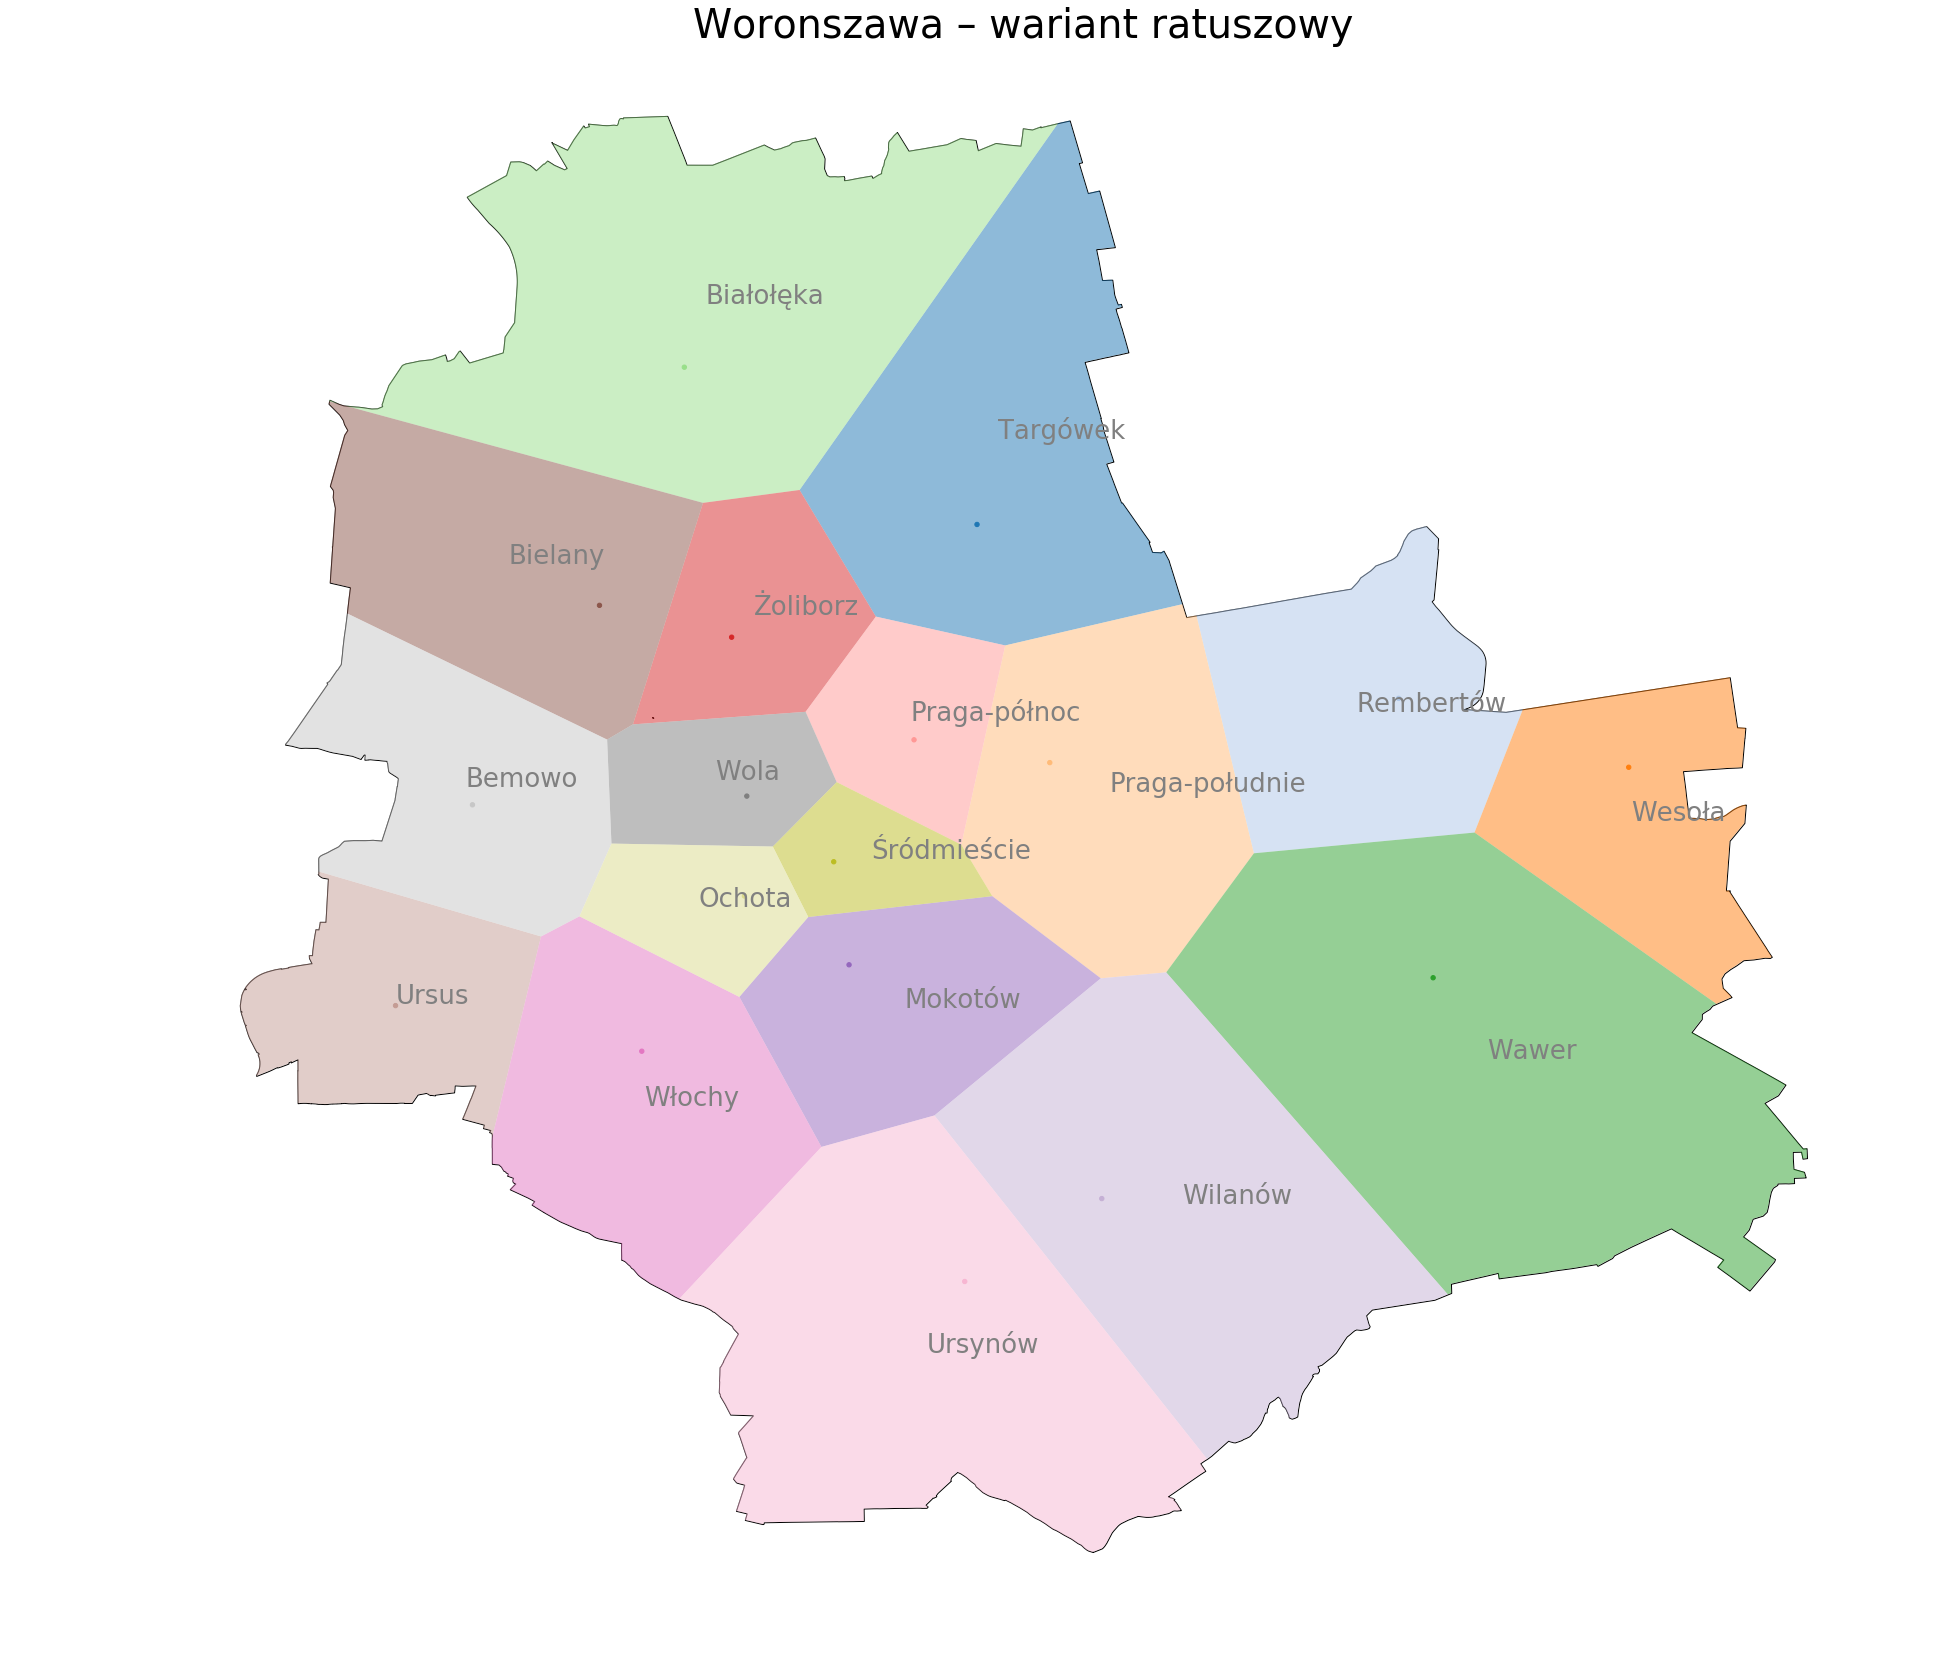

In [279]:
fig, ax = plt.subplots(figsize=(28,24))
plot_voronoi_polys_with_points_in_area(ax, 
                                       boundary_shape, 
                                       poly_shapes, 
                                       pts, 
                                       poly_to_pt_assignments,
                                       voronoi_and_points_cmap='tab20',
                                       # voronoi_edgecolor="grey",
                                       points_markersize=19,
                                       points_color="black",
                                       point_labels= None, #[d.capitalize() for d in dzielnice],
                                       point_label_fontsize=26,
                                       point_label_color="grey",
                                       voronoi_labels=[d.capitalize() for d in dzielnice_woro],
                                       voronoi_label_fontsize=26,
                                       voronoi_label_color="grey")


ax.set_title('Woronszawa – wariant ratuszowy')
ax.axis("off")
plt.tight_layout()
plt.savefig("woronszawa_ratusze_nob.png", dpi=600, format="png")

### a teraz zamiast ratuszy będą środki dzielnic

In [169]:
boundary_shape_ = cascaded_union(boundary.geometry.buffer(0))
coords_ = points_to_coords(wwa.to_crs(boundary.crs).geometry.centroid)

In [170]:
# Calculate Voronoi Regions
poly_shapes_, pts_, poly_to_pt_assignments_ = voronoi_regions_from_coords(coords_, 
                                                                          boundary_shape_)

In [171]:
dzielnice_woro_ = [list(wwa["nazwa_dzie"])[el[0]] for el in poly_to_pt_assignments_]
dzielnice_woro_

['Rembertów',
 'Wesoła',
 'Wola',
 'Bemowo',
 'Żoliborz',
 'Śródmieście',
 'Ochota',
 'Ursus',
 'Włochy',
 'Bielany',
 'Mokotów',
 'Wilanów',
 'Ursynów',
 'Białołęka',
 'Wawer',
 'Targówek',
 'Praga-Południe',
 'Praga-Północ']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


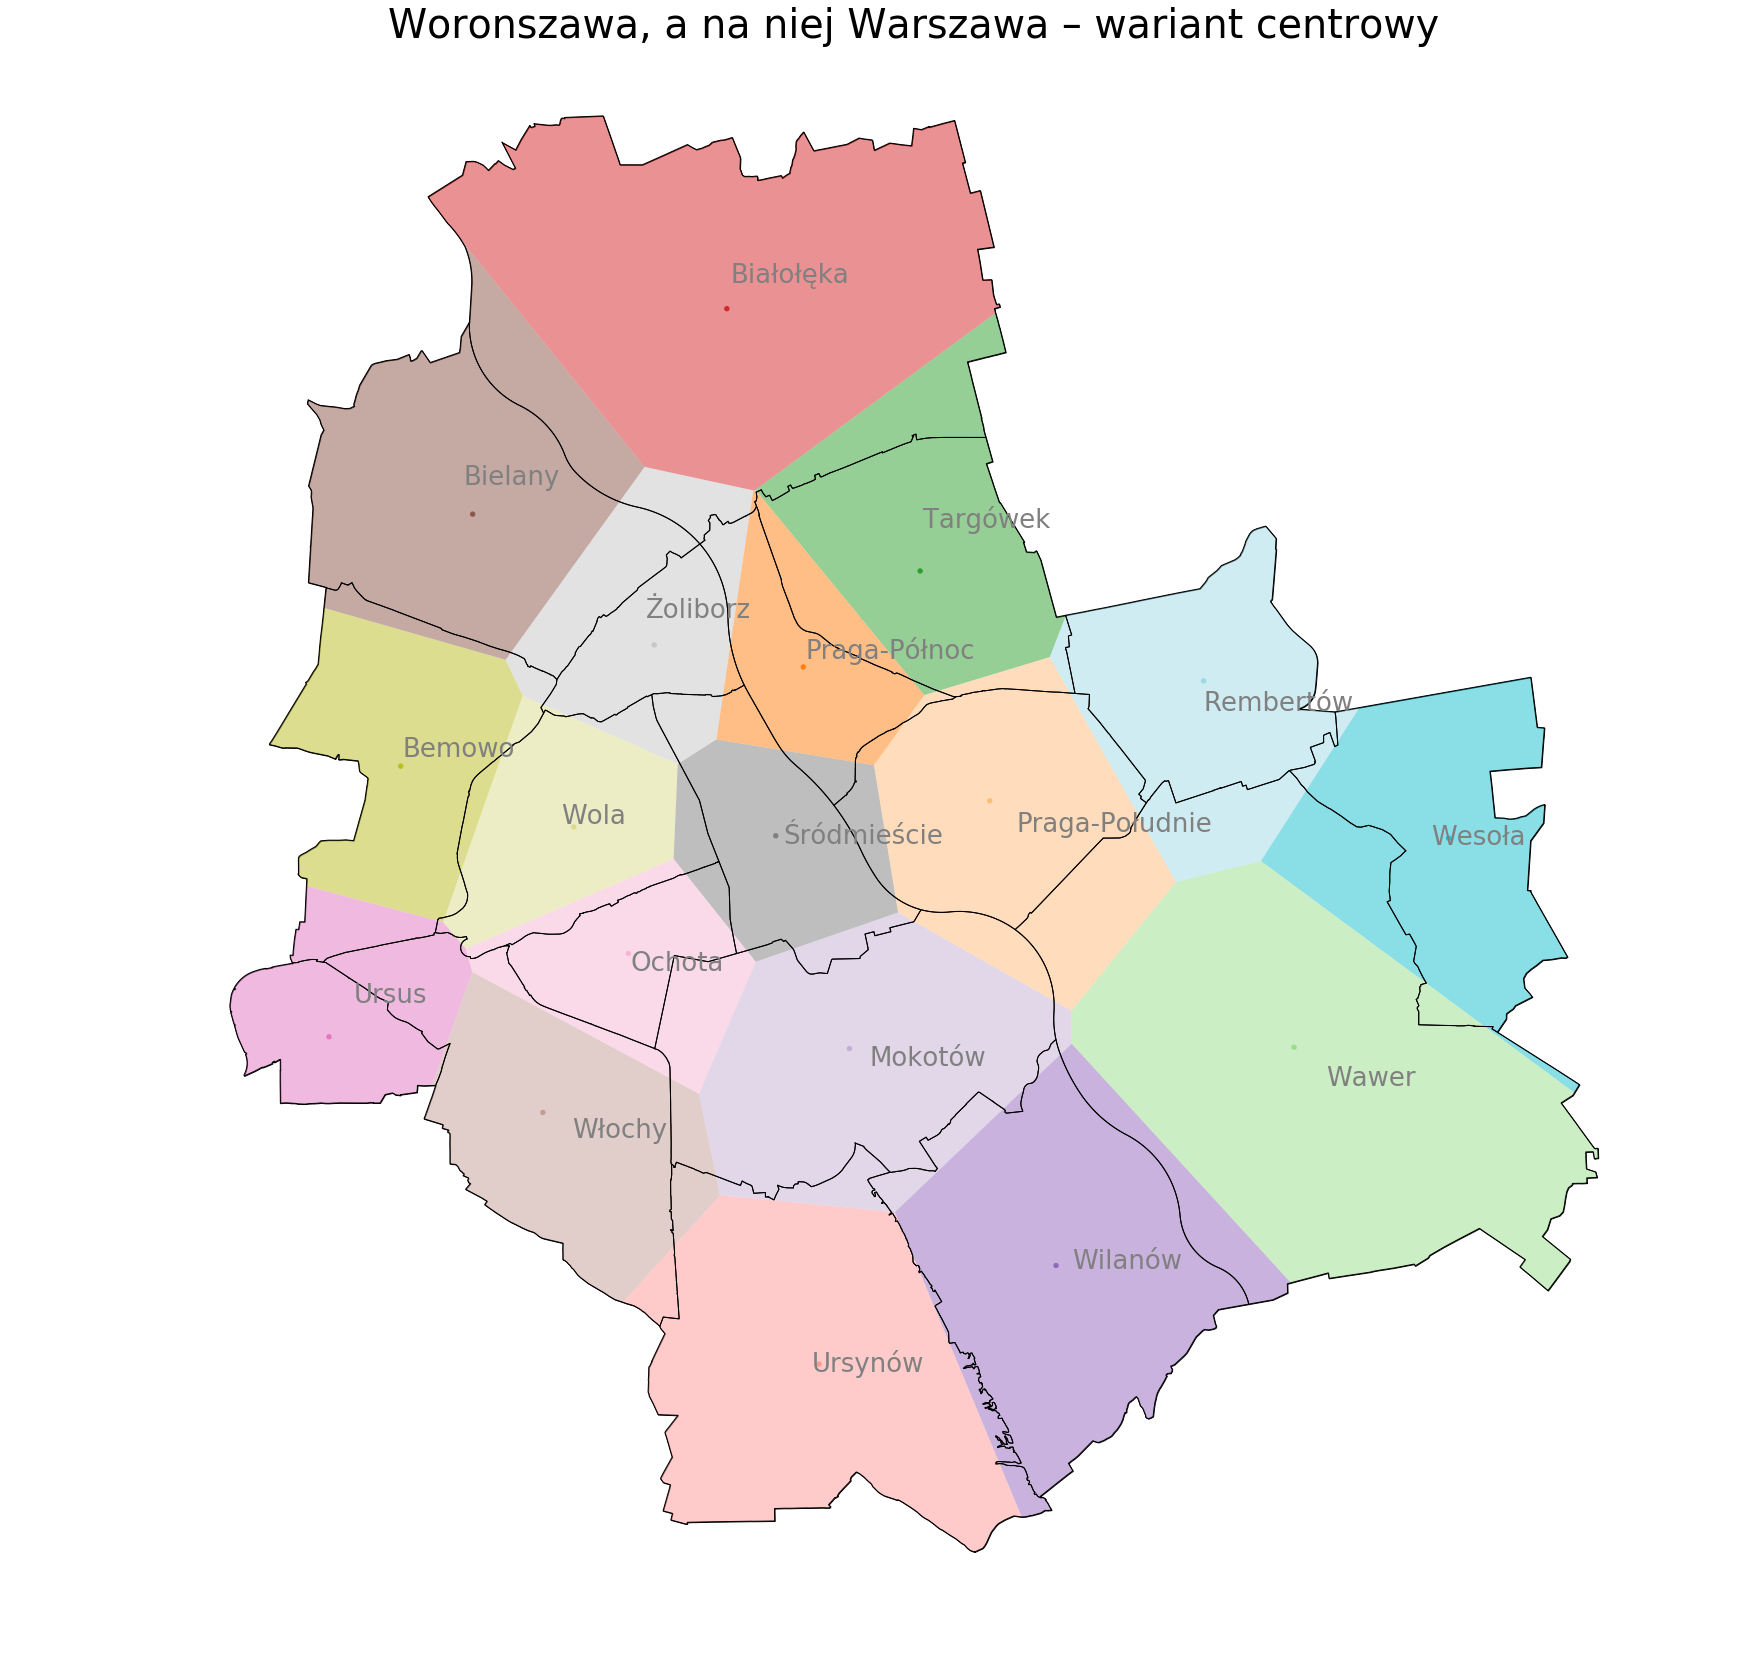

In [172]:
fig, ax = plt.subplots(figsize=(28,24))
plot_voronoi_polys_with_points_in_area(ax, 
                                       boundary_shape_, 
                                       poly_shapes_, 
                                       pts_, 
                                       poly_to_pt_assignments_,
                                       voronoi_and_points_cmap='tab20_r',
                                       # voronoi_edgecolor="grey",
                                       points_markersize=19,
                                       points_color=None,
                                       point_labels = None, # list(wwa["nazwa_dzie"]),
                                       point_label_fontsize=26,
                                       point_label_color="grey",
                                       voronoi_labels=dzielnice_woro_,
                                       voronoi_label_fontsize=26,
                                       voronoi_label_color="grey")
wwa.to_crs(gdf_proj.crs).plot(ax=ax, facecolor="none", edgecolor="black")
ax.set_title('Woronszawa, a na niej Warszawa – wariant centrowy')
ax.axis("off")
plt.tight_layout()
plt.savefig("woronszawa_centra.png", dpi=600, format="png")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


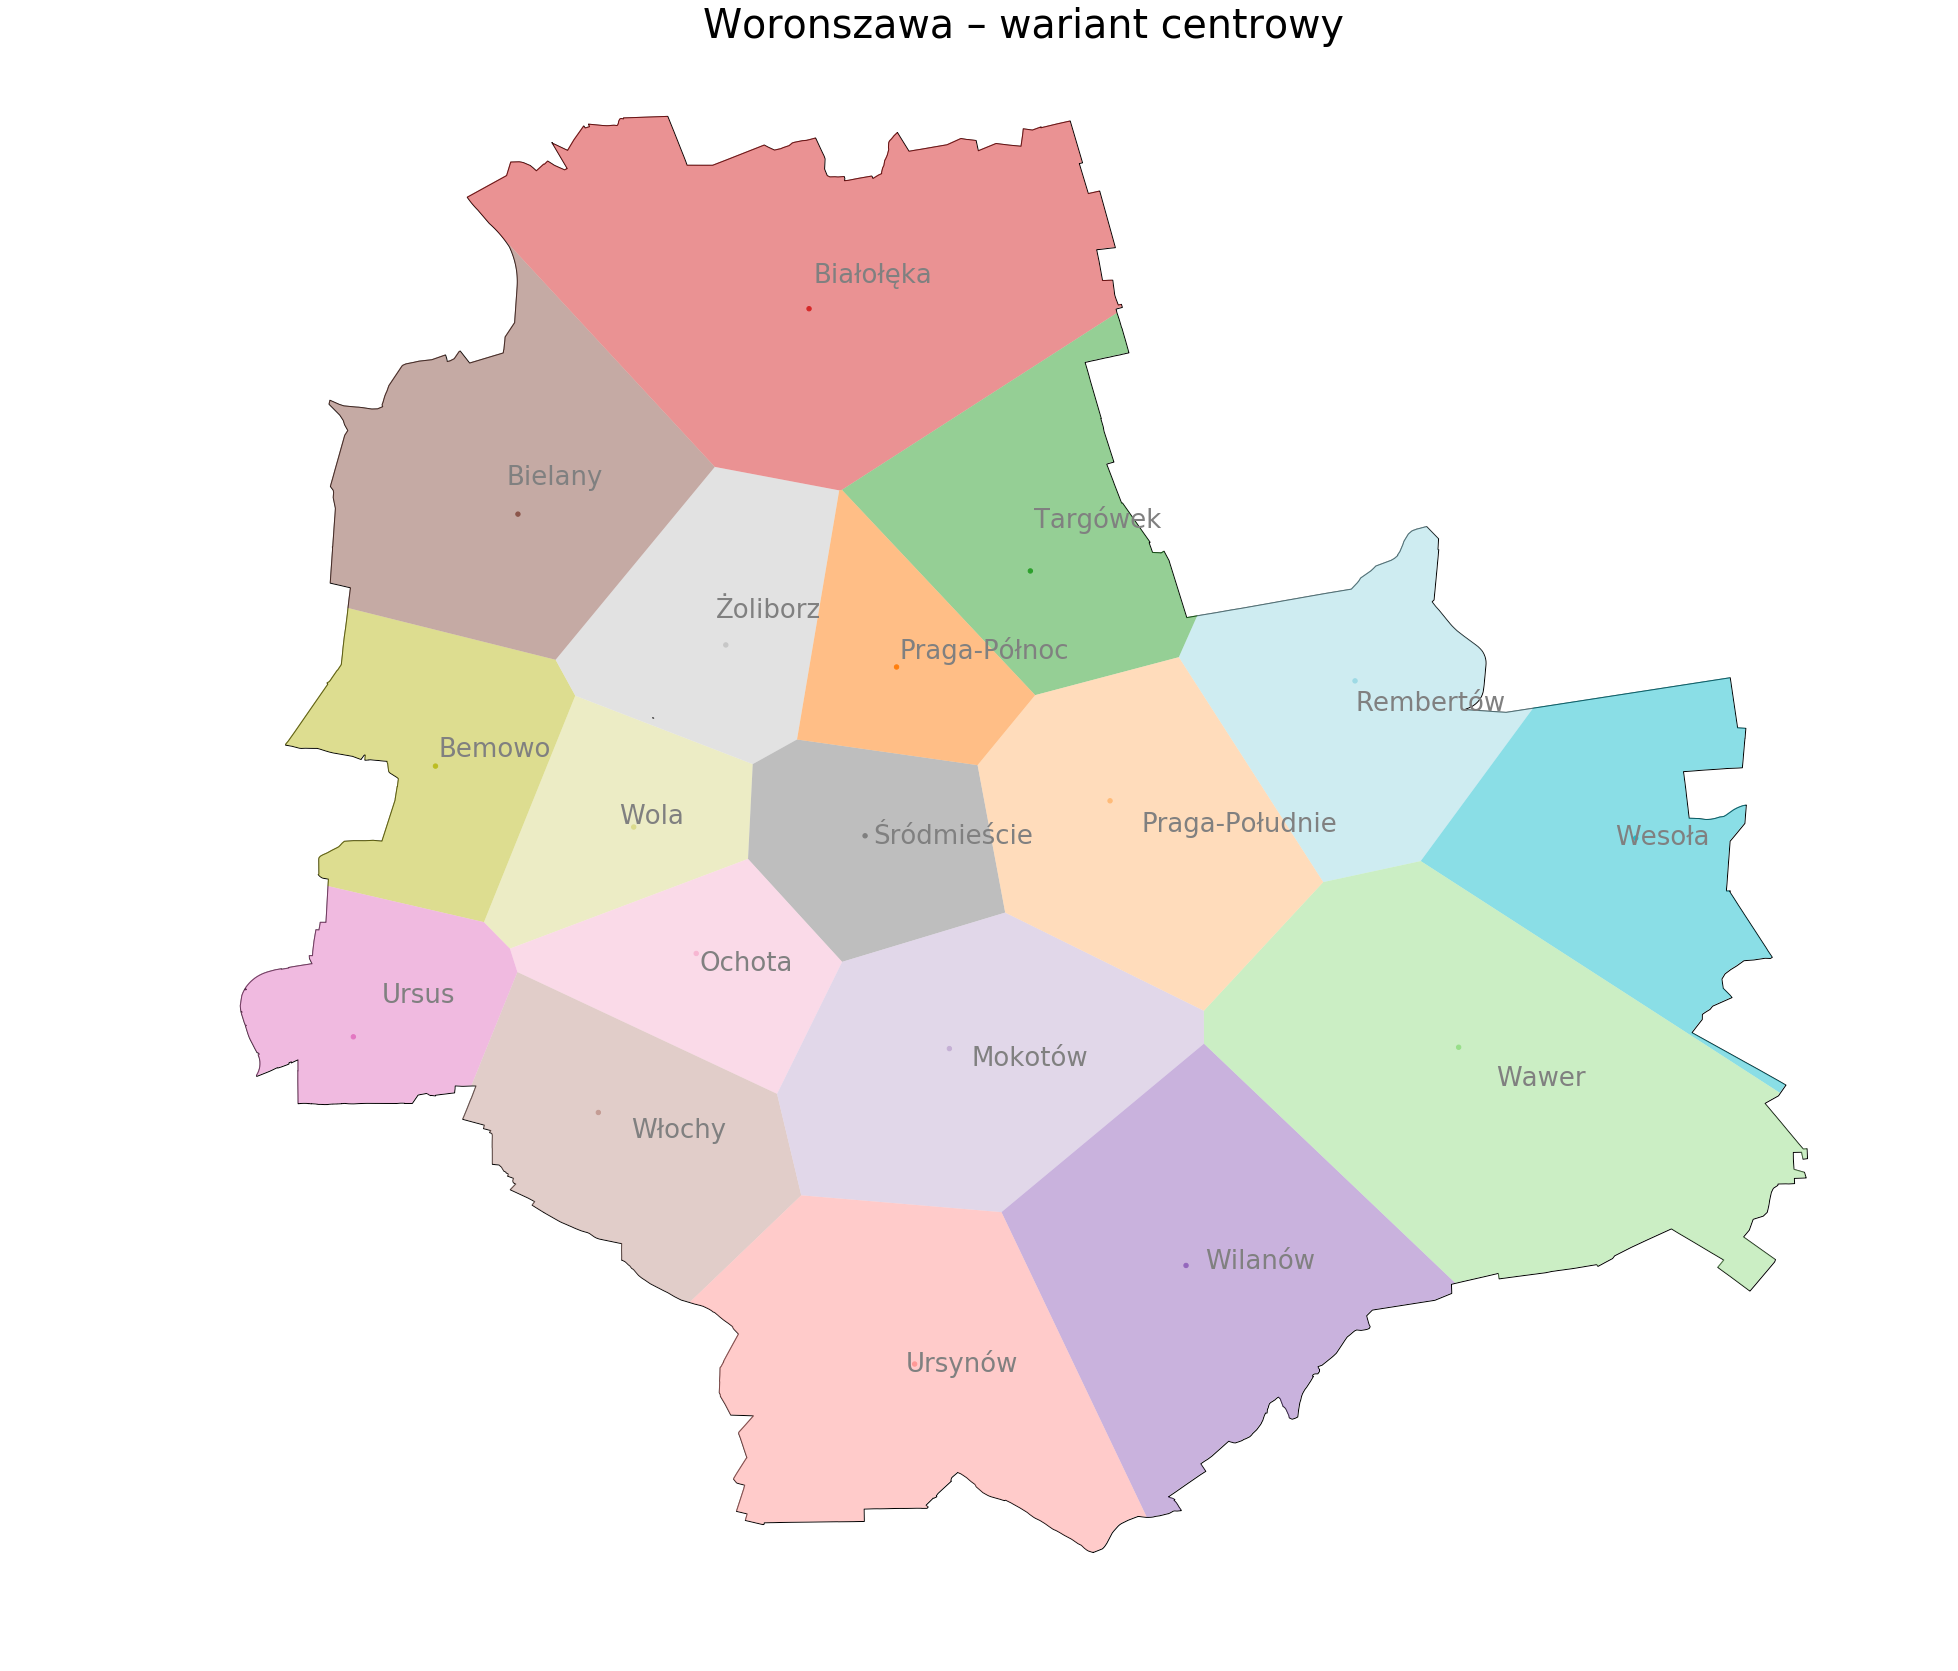

In [173]:
fig, ax = plt.subplots(figsize=(28,24))
plot_voronoi_polys_with_points_in_area(ax, 
                                       boundary_shape_, 
                                       poly_shapes_, 
                                       pts_, 
                                       poly_to_pt_assignments_,
                                       voronoi_and_points_cmap='tab20_r',
                                       # voronoi_edgecolor="grey",
                                       points_markersize=19,
                                       points_color=None,
                                       point_labels = None, # list(wwa["nazwa_dzie"]),
                                       point_label_fontsize=26,
                                       point_label_color="grey",
                                       voronoi_labels=dzielnice_woro_,
                                       voronoi_label_fontsize=26,
                                       voronoi_label_color="grey")

ax.set_title('Woronszawa – wariant centrowy')
ax.axis("off")
plt.tight_layout()
plt.savefig("woronszawa_centra_nob.png", dpi=600, format="png")

### eksport

Mogę gotowego voronoia wyeksportować

In [135]:
# eksport

# poly_shapes 
# pts, 
# poly_to_pt_assignments
points = [pts[el[0]] for el in poly_to_pt_assignments]


df_voro = pd.DataFrame({
    "nazwa_dziel": dzielnice_woro,
    "geometry": poly_shapes,
    "ratusze": points
})
gdf_voro = gpd.GeoDataFrame(df_voro, geometry="geometry")
gdf_voro

,nazwa_dziel,geometry,ratusze
0,targówek,"POLYGON ((2349278.781 6816442.282, 2344004.447...",POINT (2343164.184346597 6819163.449818984)
1,rembertów,"POLYGON ((2359430.110 6812859.382, 2357986.790...",POINT (2355726.143604654 6813229.036572828)
2,wesoła,"POLYGON ((2357986.790 6808650.593, 2359430.110...",POINT (2362581.420486686 6810878.156365411)
3,praga-południe,"POLYGON ((2349700.760 6816061.032, 2351413.168...",POINT (2345332.354068778 6811036.84308535)
4,wawer,"POLYGON ((2351413.168 6807942.037, 2357986.790...",POINT (2356753.733824167 6803695.57102999)
5,białołęka,"MULTIPOLYGON (((2345582.618 6832861.196, 23378...",POINT (2334443.749396325 6824530.368582204)
6,żoliborz,"POLYGON ((2337877.038 6820340.790, 2340150.773...",POINT (2335852.831510786 6815316.585954357)
7,praga-północ,"POLYGON ((2340150.773 6816019.329, 2344004.447...",POINT (2341287.449051314 6811815.269671852)
8,mokotów,"POLYGON ((2346853.578 6803676.122, 2341895.046...",POINT (2339351.491786927 6804137.691403264)
9,wilanów,"POLYGON ((2341895.046 6798995.642, 2346853.578...",POINT (2346881.92138062 6796159.903293621)


In [136]:
gdf_voro.crs = gdf_proj.crs
gdf_voro.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - between 80°S and 84°N
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


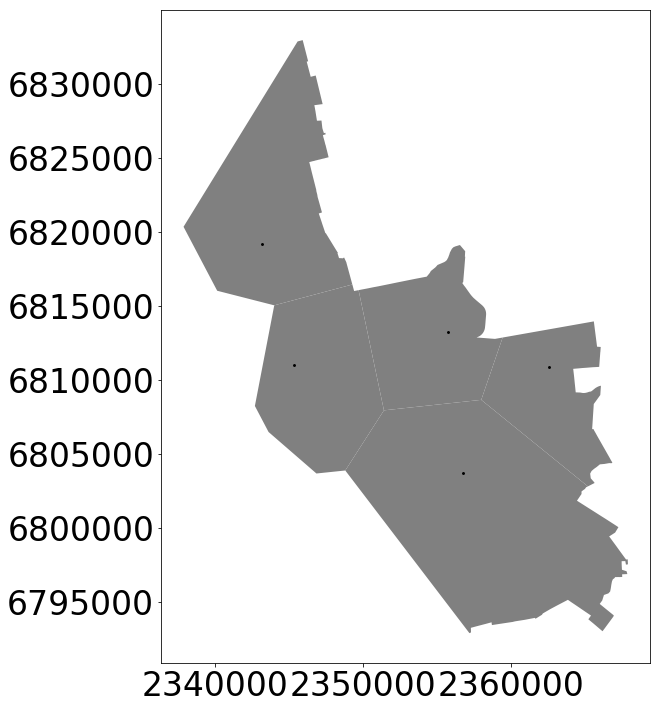

In [308]:
fig, ax = plt.subplots(figsize=(14,12))
gdf_voro.iloc[:5].plot(ax=ax, color="grey")
gdf_voro.iloc[:5].set_geometry('ratusze').plot(ax=ax, markersize=3.5, color="black")
plt.show()

In [147]:
gdf_voro.nazwa_dziel = gdf_voro.nazwa_dziel.apply(lambda x: x.capitalize())
gdf_voro

,nazwa_dziel,geometry,ratusze
0,Targówek,"POLYGON ((2349278.781 6816442.282, 2344004.447...",POINT (2343164.184346597 6819163.449818984)
1,Rembertów,"POLYGON ((2359430.110 6812859.382, 2357986.790...",POINT (2355726.143604654 6813229.036572828)
2,Wesoła,"POLYGON ((2357986.790 6808650.593, 2359430.110...",POINT (2362581.420486686 6810878.156365411)
3,Praga-południe,"POLYGON ((2349700.760 6816061.032, 2351413.168...",POINT (2345332.354068778 6811036.84308535)
4,Wawer,"POLYGON ((2351413.168 6807942.037, 2357986.790...",POINT (2356753.733824167 6803695.57102999)
5,Białołęka,"MULTIPOLYGON (((2345582.618 6832861.196, 23378...",POINT (2334443.749396325 6824530.368582204)
6,Żoliborz,"POLYGON ((2337877.038 6820340.790, 2340150.773...",POINT (2335852.831510786 6815316.585954357)
7,Praga-północ,"POLYGON ((2340150.773 6816019.329, 2344004.447...",POINT (2341287.449051314 6811815.269671852)
8,Mokotów,"POLYGON ((2346853.578 6803676.122, 2341895.046...",POINT (2339351.491786927 6804137.691403264)
9,Wilanów,"POLYGON ((2341895.046 6798995.642, 2346853.578...",POINT (2346881.92138062 6796159.903293621)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


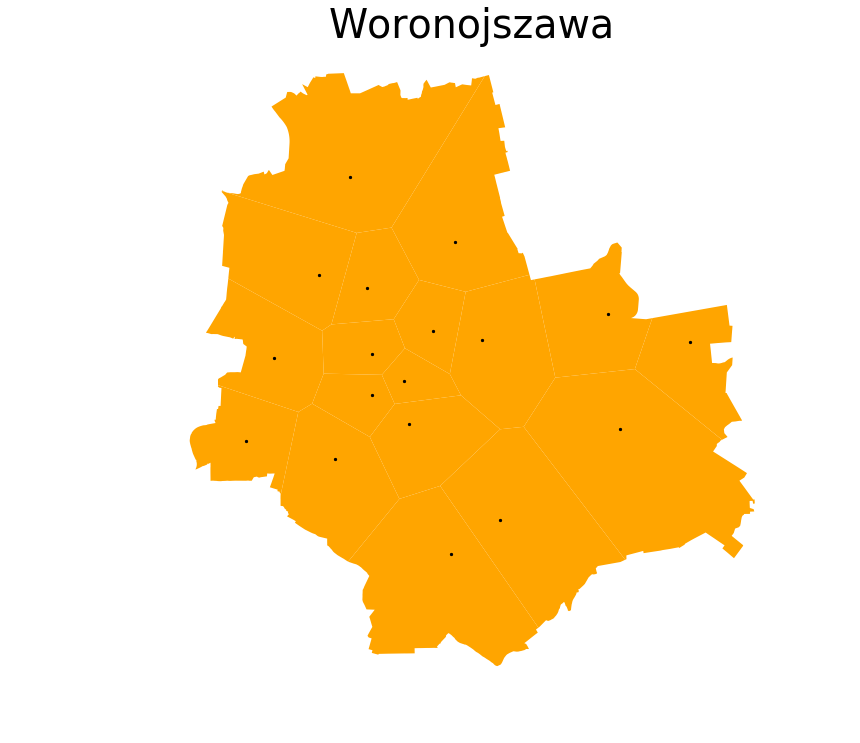

In [309]:
fig, ax = plt.subplots(figsize=(14,12))

gdf_voro.plot(ax=ax, color="orange")
gdf_voro.set_geometry("ratusze").plot(ax=ax, color="black", markersize=5)
plt.title("Woronojszawa")
ax.axis("off")
plt.show()

In [160]:
gdf_voro["ratusze_x"] = gdf_voro.ratusze.apply(lambda x: x.x)
gdf_voro["ratusze_y"] = gdf_voro.ratusze.apply(lambda x: x.y)
gdf_voro

,nazwa_dziel,geometry,ratusze,ratusze_x,ratusze_y
0,Targówek,"POLYGON ((2349278.781 6816442.282, 2344004.447...",POINT (2343164.184346597 6819163.449818984),2.343164e+06,6.819163e+06
1,Rembertów,"POLYGON ((2359430.110 6812859.382, 2357986.790...",POINT (2355726.143604654 6813229.036572828),2.355726e+06,6.813229e+06
2,Wesoła,"POLYGON ((2357986.790 6808650.593, 2359430.110...",POINT (2362581.420486686 6810878.156365411),2.362581e+06,6.810878e+06
3,Praga-południe,"POLYGON ((2349700.760 6816061.032, 2351413.168...",POINT (2345332.354068778 6811036.84308535),2.345332e+06,6.811037e+06
4,Wawer,"POLYGON ((2351413.168 6807942.037, 2357986.790...",POINT (2356753.733824167 6803695.57102999),2.356754e+06,6.803696e+06
5,Białołęka,"MULTIPOLYGON (((2345582.618 6832861.196, 23378...",POINT (2334443.749396325 6824530.368582204),2.334444e+06,6.824530e+06
6,Żoliborz,"POLYGON ((2337877.038 6820340.790, 2340150.773...",POINT (2335852.831510786 6815316.585954357),2.335853e+06,6.815317e+06
7,Praga-północ,"POLYGON ((2340150.773 6816019.329, 2344004.447...",POINT (2341287.449051314 6811815.269671852),2.341287e+06,6.811815e+06
8,Mokotów,"POLYGON ((2346853.578 6803676.122, 2341895.046...",POINT (2339351.491786927 6804137.691403264),2.339351e+06,6.804138e+06
9,Wilanów,"POLYGON ((2341895.046 6798995.642, 2346853.578...",POINT (2346881.92138062 6796159.903293621),2.346882e+06,6.796160e+06


In [161]:
gdf_voro.drop(columns=["ratusze"]).to_file("woronszawa.shp", encoding="utf-8")

In [178]:
gdf_voro = gdf_voro.drop(columns=["ratusze_x", "ratusze_y"])

In [265]:
ix = np.arange(gdf_voro.shape[0])
np.random.shuffle(ix)          # randomowe liczby aby pokolorować
gdf_voro["i"] = ix
gdf_voro

,nazwa_dziel,geometry,ratusze,i
0,Targówek,"POLYGON ((2349278.781 6816442.282, 2344004.447...",POINT (2343164.184346597 6819163.449818984),17
1,Rembertów,"POLYGON ((2359430.110 6812859.382, 2357986.790...",POINT (2355726.143604654 6813229.036572828),10
2,Wesoła,"POLYGON ((2357986.790 6808650.593, 2359430.110...",POINT (2362581.420486686 6810878.156365411),2
3,Praga-południe,"POLYGON ((2349700.760 6816061.032, 2351413.168...",POINT (2345332.354068778 6811036.84308535),15
4,Wawer,"POLYGON ((2351413.168 6807942.037, 2357986.790...",POINT (2356753.733824167 6803695.57102999),16
5,Białołęka,"MULTIPOLYGON (((2345582.618 6832861.196, 23378...",POINT (2334443.749396325 6824530.368582204),7
6,Żoliborz,"POLYGON ((2337877.038 6820340.790, 2340150.773...",POINT (2335852.831510786 6815316.585954357),9
7,Praga-północ,"POLYGON ((2340150.773 6816019.329, 2344004.447...",POINT (2341287.449051314 6811815.269671852),4
8,Mokotów,"POLYGON ((2346853.578 6803676.122, 2341895.046...",POINT (2339351.491786927 6804137.691403264),12
9,Wilanów,"POLYGON ((2341895.046 6798995.642, 2346853.578...",POINT (2346881.92138062 6796159.903293621),13


In [255]:
import matplotlib
plt.rcParams['figure.figsize'] = [18, 16]
font = {'family' : 'normal' ,#'Comic Sans MS',
        'weight' : 'normal',
        'size'   : 33}
matplotlib.rc('font', **font)

#### wariant 1
etykiety na środkach prawdziwych dzielnic

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


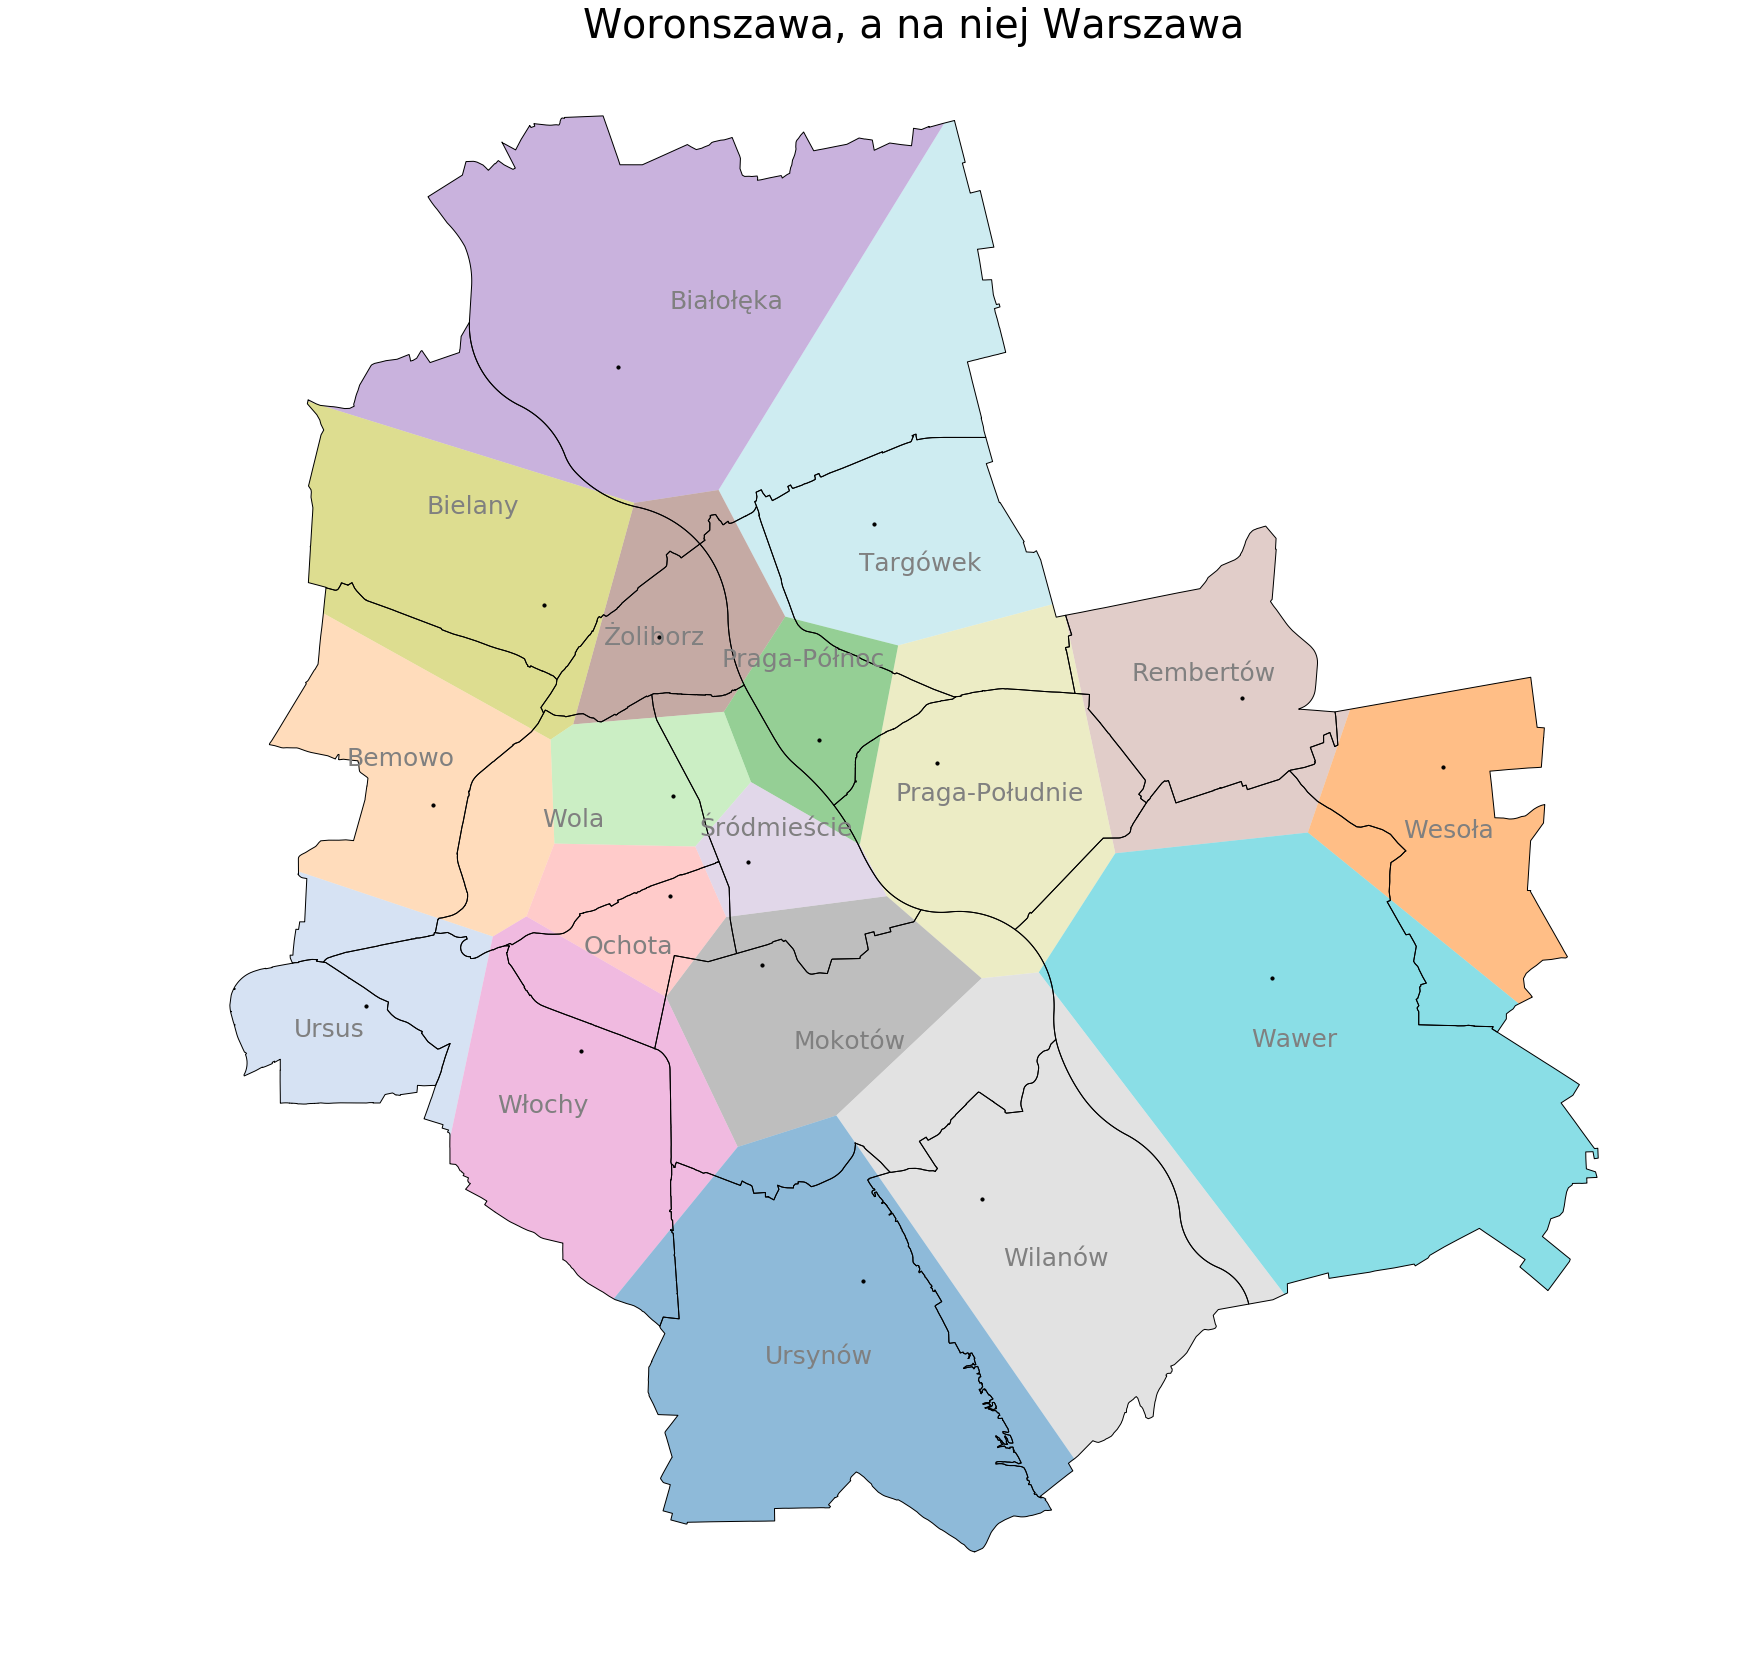

In [306]:
fig, ax = plt.subplots(figsize=(28,24))

gdf_voro.plot(ax=ax, column="i", cmap="tab20", alpha=0.5) # , edgecolor="grey")
gdf_voro.set_geometry("ratusze").plot(ax=ax, color="black", markersize=10)
plt.title("Woronszawa, a na niej Warszawa")

wwa.to_crs(gdf_voro.crs).plot(ax=ax, facecolor="none", edgecolor="black")
for idx, row in wwa.to_crs(gdf_voro.crs).iterrows():
    plt.annotate(s=row['nazwa_dzie'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', color="grey", fontsize=25)

ax.axis("off")
plt.savefig("woronszawa_points.png", dpi=600, format="png")
plt.tight_layout()

plt.show()

#### wariant 2
etykiety na środkach dzielnic woronszawy

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


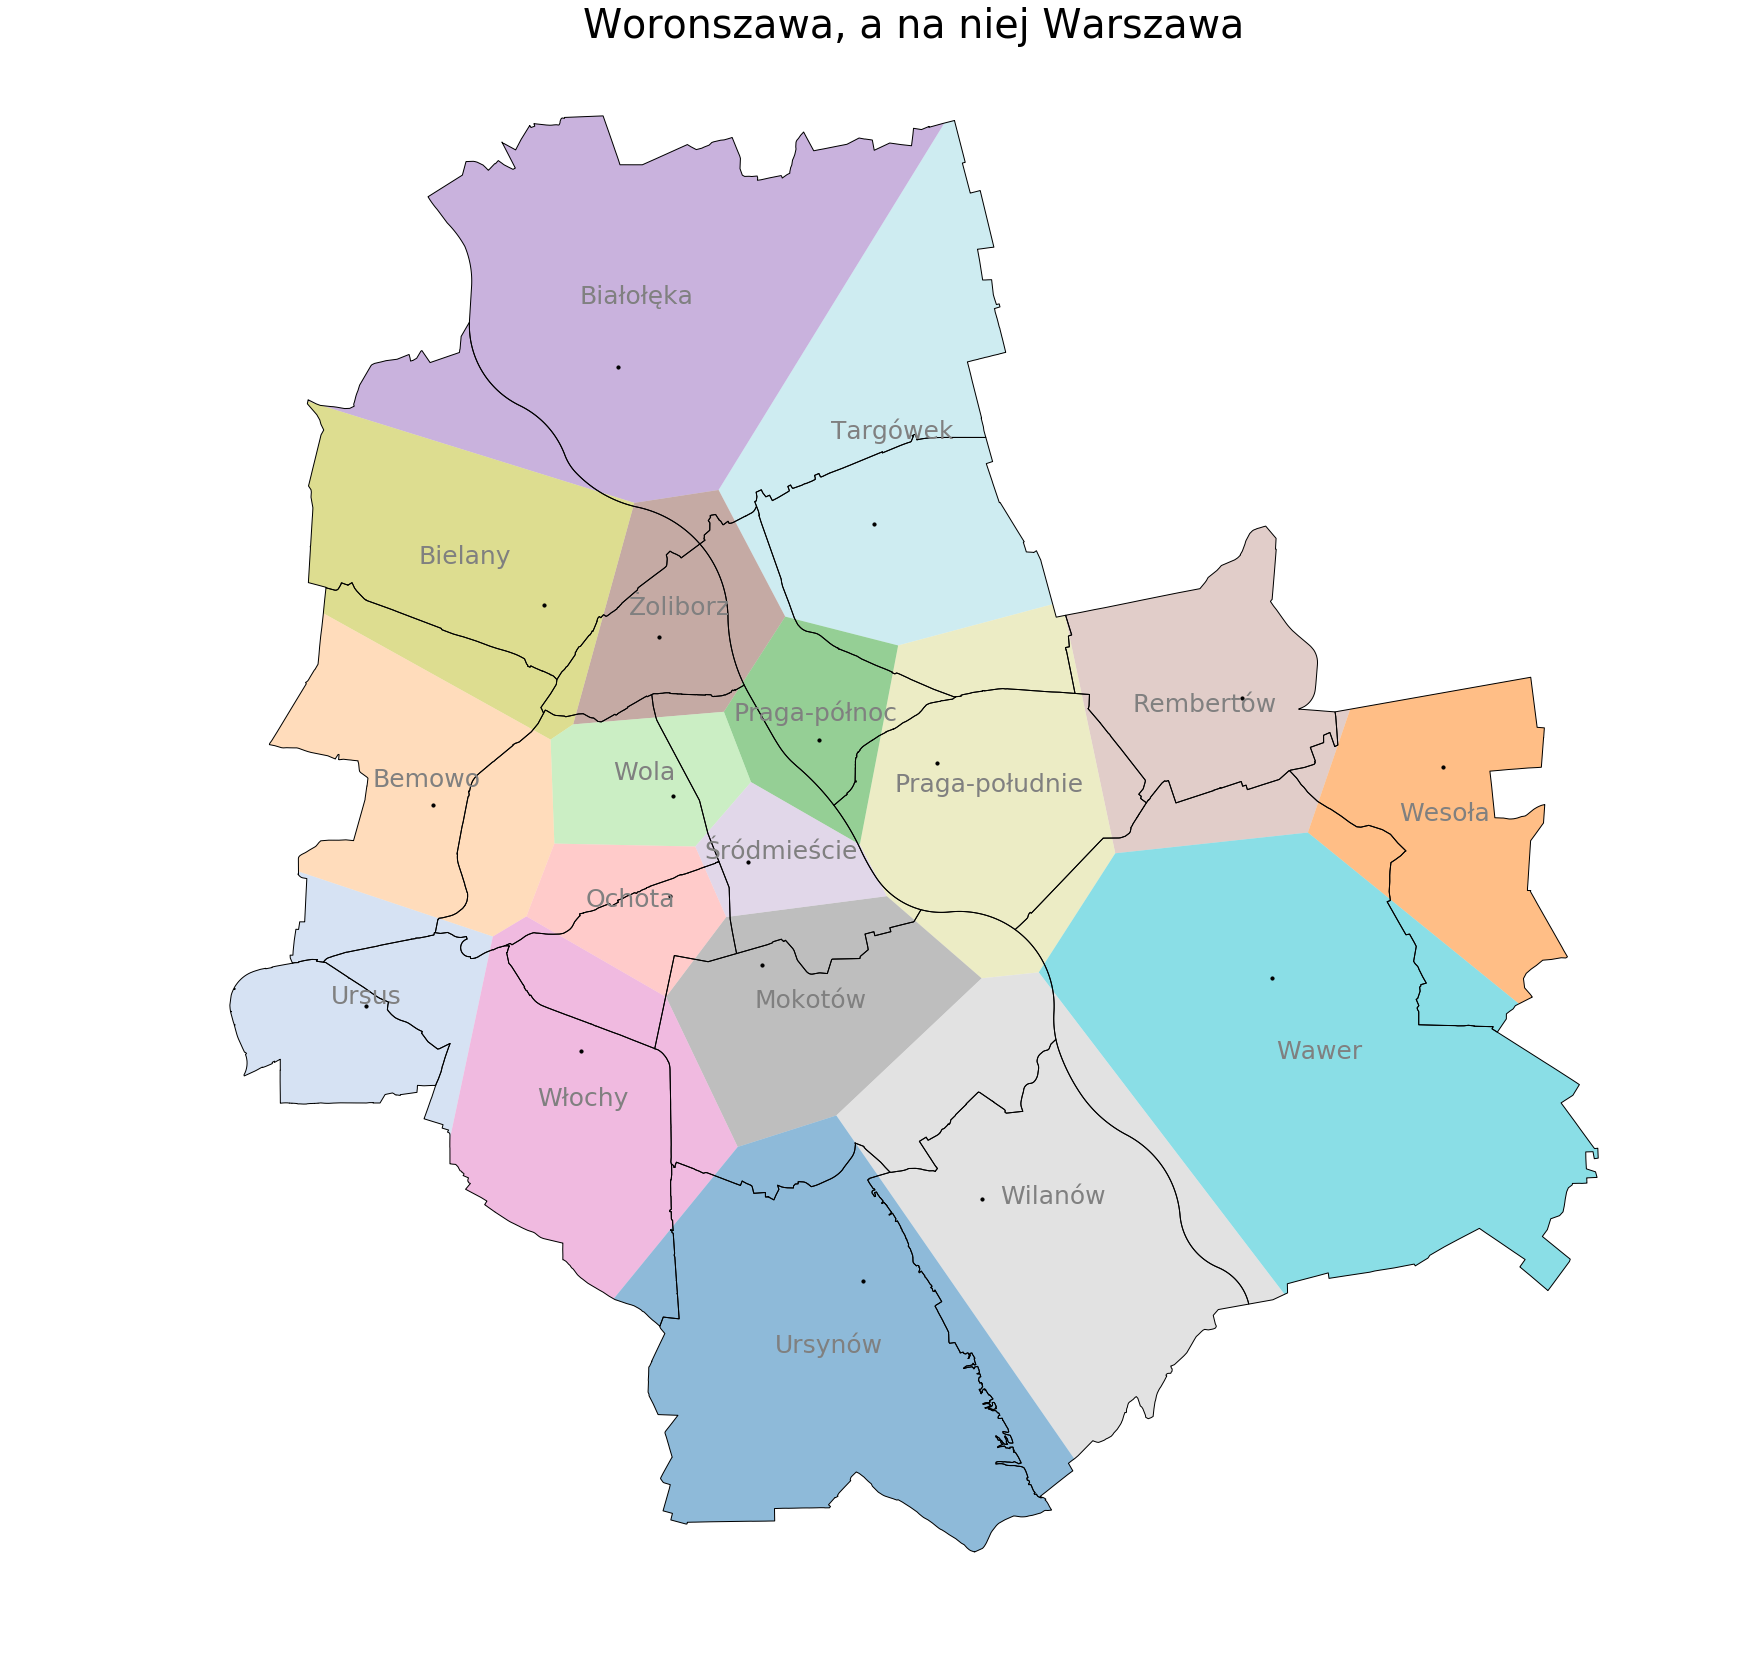

In [307]:
fig, ax = plt.subplots(figsize=(28,24))

gdf_voro.plot(ax=ax, column="i", cmap="tab20", alpha=0.5) # , edgecolor="grey")
gdf_voro.set_geometry("ratusze").plot(ax=ax, color="black", markersize=10)
plt.title("Woronszawa, a na niej Warszawa")

wwa.to_crs(gdf_voro.crs).plot(ax=ax, facecolor="none", edgecolor="black")
for idx, row in gdf_voro.iterrows():
    plt.annotate(s=row['nazwa_dziel'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', color="grey", fontsize=25)

ax.axis("off")
plt.savefig("woronszawa_points_p.png", dpi=600, format="png")
plt.tight_layout()

plt.show()

## Folium?

In [311]:
import folium

In [427]:
key = "i"

import branca.colormap as cm
def c_map(key, m=1, colours=["yellow", "green", "blue"]):
    cmax = max(gdf_voro[key])
    cmin = min(gdf_voro[key])
    if m == 1:
        return cm.linear.YlOrRd_09.scale(cmin, cmax)
    
    colour_map = cm.LinearColormap(
        colours,
        # ["red", "#f46d43", "#006d2c", "#74add1", "blue"],
        # ["#2166ac","#74add1",  "white","#ea2c25", "#b2182b"],
        #["blue", "#2166ac", "#efefef", "#b2182b"],
        # ["blue", "#2166ac", "#efefef", "#b2182b", "red"],  # piękne
        # ["#2166ac", "white", "#ce0000"],
        # ["#356bb2","#74add1", "white", "#ce4100", "red"],
        # ["#2166ac","#74add1", "white", "#ce4100", "#ac6621"],
        # ["#356bb2","#74add1", "white", "#ce4100", "#ce0000"],
        #light blue: 74add1 e0f3f8 oran: "#f46d43" b2182b
        # dark blue #2166ac red: f03b20  f45942 ea2c25
        vmin = cmin, vmax=cmax
        #index = [cmin, (cmax+cmin)/2, cmax]
        # index = [0, 0.25, 0.5, 0.75, 1] # pikne
        # index = [0, 0.5, 1]
    )
    return colour_map
#colour_map = c_map(key, 2, colours=["#ca0020", "#f7f7f7", "#2166ac"][::-1])
colour_map = c_map(key, 2, colours=["blue", "yellow", "purple","red", "green", "#ff8c00", "#bae1ff", "pink", "teal"]) #f2850


colour_map = colour_map.to_step(len(dzielnice))
colour_map

In [451]:
mapa = folium.Map(width=700, height=700, zoom_start=10,
                  location=[52.11, 21], tiles='stamentoner')
mapa

In [452]:
"""
Wersja interaktywna – najeżdżasz na gminę i coś widzisz. Brak potrzeby dla pliku 
gminki.geojson bo jak się okazuje od niedawna folium pozwala na geopandaśne
data frame'y
"""



#folium.TileLayer('https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_nolabels/{z}/{x}/{y}.png', 
 #attr = '&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> &copy; <a href="http://cartodb.com/attributions">CartoDB</a>'
#).add_to(mapa)
folium.TileLayer('http://tile.stamen.com/toner-background/{z}/{x}/{y}.png',
                 attr="Tile from <a href='http://maps.stamen.com/#watercolor/12/37.7706/-122.3782'>Stamen</a> – toner-background"
).add_to(mapa)


df = gdf_voro[["nazwa_dziel", "geometry", "i"]]

folium.GeoJson(
    df,
    name="woronszawa",
    style_function=lambda x: {
        'color': 'black',
        'fillOpacity': 0.6,
        'weight': 0.1,
        "stroke": True,
        'fillColor': '#black' if x["properties"][key] is None else colour_map(x["properties"][key])
    },
    highlight_function = lambda feature: {
        'color': "#000",
        'weight': 1.3,
    }, 
    tooltip=folium.features.GeoJsonTooltip(fields=["nazwa_dziel"],
                                          aliases=['dzielnica'],
                                           labels=True, 
                                           sticky=True
                                    )).add_to(mapa)

colour_map.caption = ""
#colour_map.add_to(mapa)

#mapa.save(outfile="woronszawa.html")
mapa.save(outfile="woronszawa_nomark.html")
mapa

In [453]:
for i in range(len(ratusze)):
    folium.CircleMarker(
        location = (ratusze[i].y, ratusze[i].x), 
        radius=0.5,
        tooltip=dzielnice[i].capitalize() + " Ratusz",
        color="black"
     ).add_to(mapa)

    
mapa.save(outfile="woronszawa.html")
mapa